In [7]:
import os
from google.colab import drive
drive.mount('/content/drive')
import sys
#sys.path.insert(0, './../')
sys.path.append('/content/drive/MyDrive/Colab Notebooks/')
%pip install psds_eval
import bbdc2021 as bbdc

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
def pipeline_rnn_1(pipe_param, model_param):
    # load
    x_dev, y_dev, timep, filelist_dev, x_ch, filelist_ch = bbdc.loading_block2(pipe_param)
    # shuffle
    x_dev, y_dev, filelist_dev = bbdc.shuffle_block1(x_dev, y_dev, filelist_dev)
    # split (tv=train and val set)
    x_tv, x_test, y_tv, y_test, filelist_test = bbdc.split_block1(x_dev, y_dev, timep, filelist_dev, pipe_param)
    # model fit (or load)
    history, model = bbdc.model_block1_rnn(x_tv, y_tv, model_param)
    # evaluate
    scores_list, model_psds = bbdc.evaluation_block1(x_test, y_test, timep, filelist_test, model, pipe_param)
    # save submission file without post proccesing
    bbdc.challenge_prediction_block1(model.predict(x_ch), timep, filelist_ch, pipe_param)
    # post processing and its evaluation
    pp_pred_test, pp_pred_ch, pp_psds = bbdc.postprocessing_with_evaluation_block1(x_test, y_test, timep,
                                                                               filelist_test, x_ch,
                                                                               filelist_ch, model, pipe_param)
    # challenge prediction
    pipe_param['submission_file_path'] = pipe_param['submission_file_path'] + '.pp.csv'
    bbdc.challenge_prediction_block1(pp_pred_ch, timep, filelist_ch, pipe_param)


# gru or lstm

Mel filter version loading block.
Csv from wav files already existend. Skipping calc_fft_mel.
Scaled numpy files already existend. Skipping scaling and load_data function.
Splitting test set at indices 8000 to -1 from dev set.
Existing model.h5 removed.
Tensorflow version: 2.4.1
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 100, 32)]         0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 100, 32

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


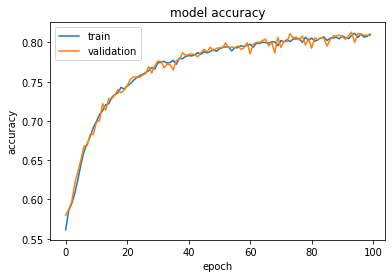

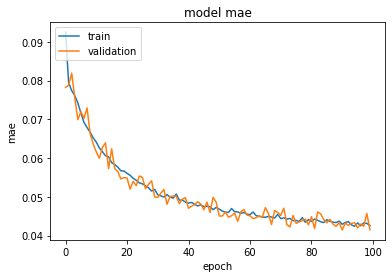

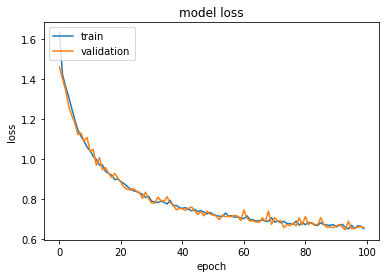

63/63 [==============================] - 0s 6ms/step - loss: 0.6574 - mae: 0.0415 - accuracy: 0.8093

Evaluation:
Loss, MAE, Accuracy [0.6573687195777893, 0.0415349118411541, 0.8093146681785583]
[[110743    422    286    638    331    418    374    245    337    438
     495    235    128]
 [  2091   3662     66     56    149    200    119     25    214    257
     111     45     46]
 [  1024     52   4627     96     35     72    114     11    304    115
      26    156     16]
 [  1844     19     10   5161     93     48     15      5     69    137
     145    211      4]
 [  1098    188     32    155   4927    226     78     12    266    137
     104    125    178]
 [  1046     64     40     18    120   5630     22      6    222    134
      11     27     24]
 [  1976    243    112    101    138     60   3187      5    233    198
     325    154     70]
 [  1222    116     19    137     84     86     47   5175     14    160
      18     85     80]
 [  1489    125     77    272    210 

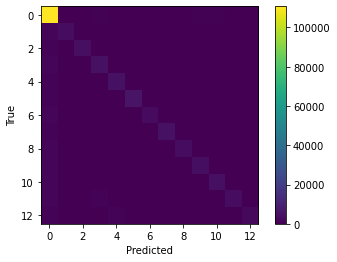

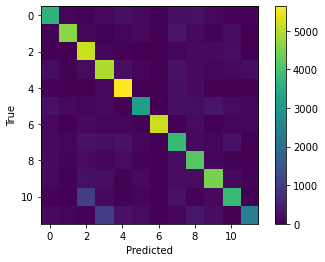

PSDS (0.2934912722976056, 'Valid file')



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission_gru3.csv
Filling post processing used.
[[111517    274    262    479    311    374    329    244    269    294
     381    238    118]
 [  2612   3709     43     36     78    100     38      0    129    185
      84     17     10]
 [  1187     37   4858     48     17     36     72      0    202     52
       9    110     20]
 [  2325      0      0   5136     61     32      0      0     19     50
      71     67      0]
 [  1277    116     26    126   5347    156     17      0    195     69
      59     68     70]
 [  1223     29     10      9     35   5928      0      2     88     39
       0      1      0]
 [  2583    181      0     47     34     11   3480      0     83     79
     239     32     33]
 [  1452     27      9     69     44     43      2   5464      0     66
       8     26     33]
 [  1964     61     36    225    130    161     25     18   3946    103
      29    189      0]
 [  2472     51     35     83      8     41     2

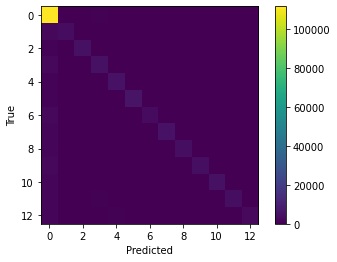

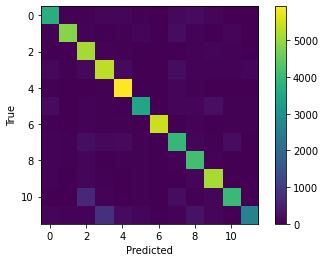

PSDS (nan, "Each file needs to have at least one label. 22 file(s) missing, e.g. ['04178_mix.wav', '04428_mix.wav', '00288_mix.wav']")


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission_gru3.csv.pp.csv


In [11]:
pipe_param = {'data_folder': '/content/drive/MyDrive/Colab Notebooks/data/',
              'wav_files_folder': 'final_pre_dataset',
              'frame_size': 0.2, 'frame_stride': 0.098,
              'mel_filter': 32, 'nfft': 512,
              'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren moechte
              'eval_csv': 'challenge_filelist_dummy.csv',
              'scaling': 'standard', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
              'test_split_range': (8000, -1), # index anfang und ende aus dev set 
              'prediction_path': './', # wo prediction csvs gespeichert werden sollen
              'post_processing': 'fill', # 'fill' is das von Jannes.
              'post_timethres': 0.8, # post processing parameter
              'post_noisethres': 0.3,
              'post_base': 2,
              'submission_file_path': './challenge_submission.csv'}

model_param = {'layers': [32, 32],
               'cell_type': 'lstm',
               'dilation_rates': (1, 2),
               'conv_filter': 32,
               'conv_kernel_size': 2,
               'val_split_range': (6400, -1), # 0.2
               'loss': 'categorical_crossentropy', # bbdc.dice_loss moeglich
               'learning_rate': 0.01,
               'batch_size': 256,
               'epochs': 100,
               'model_save_path': './',
               'load_path': None} # Wenn trainiert werden soll: None; Submission 1: 'model9561.h5'

pipeline_rnn_1(pipe_param, model_param)

Mel filter version loading block.
Csv from wav files already existend. Skipping calc_fft_mel.
Scaled numpy files already existend. Skipping scaling and load_data function.
Splitting test set at indices 8000 to -1 from dev set.
Existing model.h5 removed.
Tensorflow version: 2.4.1
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 100, 32)]         0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 100, 32

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


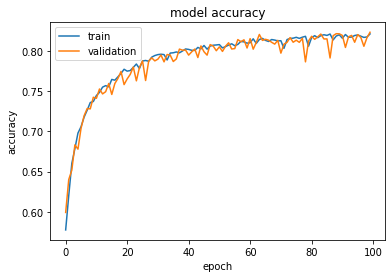

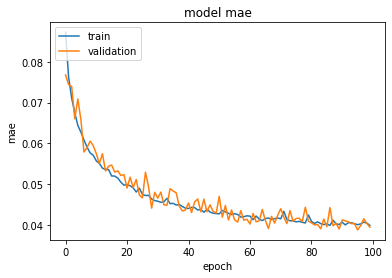

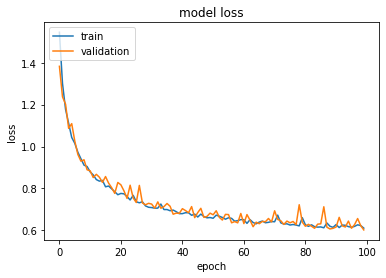

63/63 [==============================] - 0s 6ms/step - loss: 0.6049 - mae: 0.0396 - accuracy: 0.8229

Evaluation:
Loss, MAE, Accuracy [0.6049309968948364, 0.03959827497601509, 0.8228814601898193]
[[109565    673    262    281    292    411    473    428    375    579
     389    280    409]
 [  1790   4316     63     25    148    187    181     97    185    242
     162     27    162]
 [   860     52   5023     70     18     52    102     26    215    169
      26     79     96]
 [  1655     91     20   3534    131     37     60     90    205    291
     243    301     24]
 [   775    129     17     31   4885    233    127     66    154     78
      92     32    720]
 [   856    134     16     22    134   5333     34     76    177    170
      28     26    120]
 [  1571    195     38     30     88     29   3926     68    189    181
     179    113    141]
 [   734     76     21      7     11     51     57   5790     22     40
      32     40     60]
 [  1320    196     66    100    245

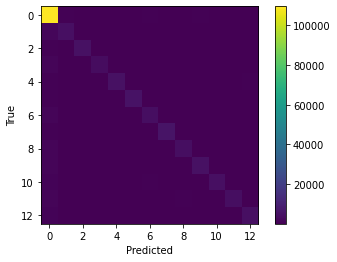

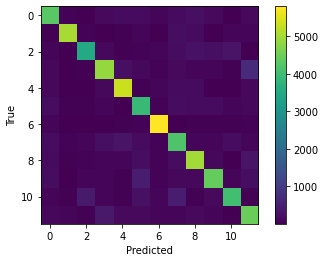

PSDS (0.3094035636501961, 'Valid file')



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv
Filling post processing used.
[[110121    493    259    245    295    407    402    419    355    423
     369    265    364]
 [  2102   4694     48     16    109     97     99     44     74    147
     106      0     49]
 [  1023      0   5356     20     10     17     50      8    136     91
      20     52      5]
 [  2251     47      0   3590    107     47     29     33     99    205
     125    142      7]
 [   896     46      0     10   5462    179     54     43     74     36
      62     18    459]
 [   994     17      0      0     60   5822      0     43     61     33
       0     18     78]
 [  1940     71      0     19     34      9   4256     25     68    104
      85     61     76]
 [   817     27      2      0      0     40     27   5984      0     10
      12     19      3]
 [  1669     63     23     37    214    250     47     38   4529     52
      65    160     41]
 [  1935     53      5     20     55     31    130    

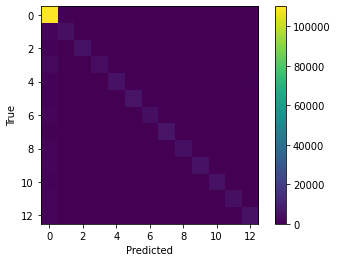

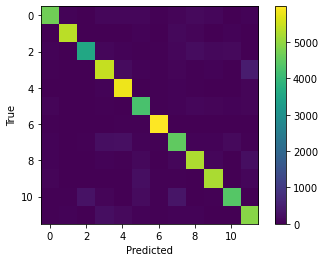

PSDS (nan, "Each file needs to have at least one label. 13 file(s) missing, e.g. ['09483_mix.wav', '04918_mix.wav', '04039_mix.wav']")


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv.pp.csv


In [13]:
pipe_param = {'data_folder': '/content/drive/MyDrive/Colab Notebooks/data/',
              'wav_files_folder': 'final_pre_dataset',
              'frame_size': 0.2, 'frame_stride': 0.098,
              'mel_filter': 32, 'nfft': 512,
              'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren moechte
              'eval_csv': 'challenge_filelist_dummy.csv',
              'scaling': 'standard', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
              'test_split_range': (8000, -1), # index anfang und ende aus dev set 
              'prediction_path': './', # wo prediction csvs gespeichert werden sollen
              'post_processing': 'fill', # 'fill' is das von Jannes.
              'post_timethres': 0.8, # post processing parameter
              'post_noisethres': 0.3,
              'post_base': 2,
              'submission_file_path': './challenge_submission.csv'}

model_param = {'layers': [32, 32],
               'cell_type': 'gru',
               'dilation_rates': (1, 2),
               'conv_filter': 32,
               'conv_kernel_size': 2,
               'val_split_range': (6400, -1), # 0.2
               'loss': 'categorical_crossentropy', # bbdc.dice_loss moeglich
               'learning_rate': 0.01,
               'batch_size': 256,
               'epochs': 100,
               'model_save_path': './',
               'load_path': None} # Wenn trainiert werden soll: None; Submission 1: 'model9561.h5'

pipeline_rnn_1(pipe_param, model_param)

# layers

Mel filter version loading block.
Csv from wav files already existend. Skipping calc_fft_mel.
Scaled numpy files already existend. Skipping scaling and load_data function.
Splitting test set at indices 8000 to -1 from dev set.
Existing model.h5 removed.
Tensorflow version: 2.4.1
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 100, 32)]         0         
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 100, 32

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


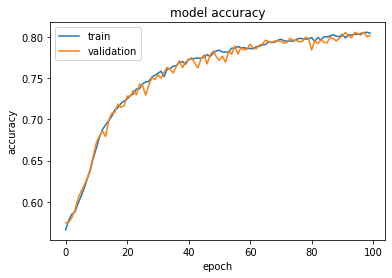

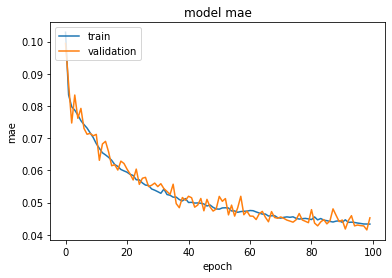

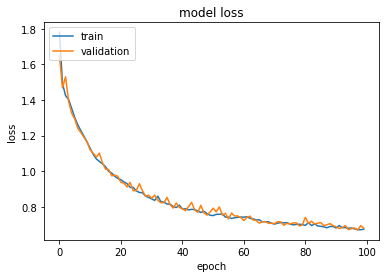

63/63 [==============================] - 1s 8ms/step - loss: 0.6843 - mae: 0.0455 - accuracy: 0.7997

Evaluation:
Loss, MAE, Accuracy [0.6842855215072632, 0.045494720339775085, 0.7996748089790344]
[[107228    884    411    530    402    367   1094    566    650    778
     534    474    365]
 [  1531   3526     97     60    241    294    313     39    215    310
      82     56    150]
 [   747     30   5462     59     30     45    182     12    172     49
      10     88     48]
 [  1641     47    110   3826    145     25    131     33    123    212
     307    888     12]
 [   729    120     37     42   5120    175    181     13    126    139
      59     41    423]
 [   866     78     68     44    230   5346     49     27    233    117
      13     24     70]
 [  1304    157    128     29    133     83   4113     22    237    218
     165    132    101]
 [   817     87     21     67     83    149     60   6037     26     34
      45    138     76]
 [  1242    139    328    116    42

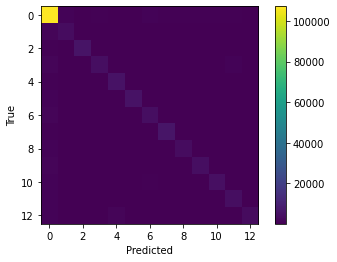

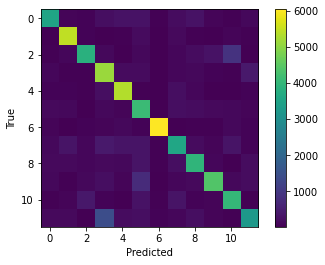

PSDS (0.23362278393592817, 'Valid file')



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv
Filling post processing used.
[[108098    716    426    361    389    313   1015    541    530    597
     482    457    358]
 [  1778   4006     36     54    118    120    228     26    187    212
      43     27     79]
 [   782      0   5870     26      1      9    120      3     88      7
       0     17     11]
 [  1992     53     70   4180    136     19     49     10     72     92
     249    570      8]
 [   910     86     13     18   5640     69    108      0     92     19
      23      0    227]
 [   982     17     17     27    126   5786     10     16    115     33
       0     17     19]
 [  1521    126     36      9     56     17   4653      9    107    109
      90     56     33]
 [   913     28      0     18     28    102     22   6423      8      0
       0     63     35]
 [  1520    111    208     43    372    218    124     55   4034     61
      95    287     40]
 [  1879    155     85     73     76     25    226    

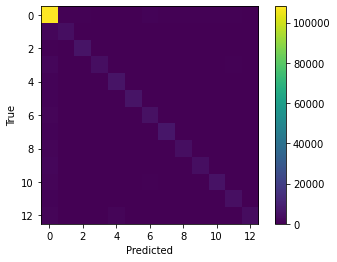

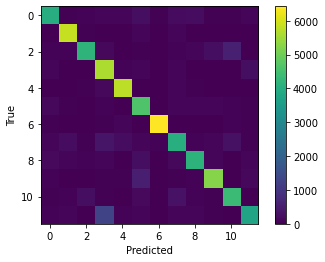

PSDS (nan, "Each file needs to have at least one label. 4 file(s) missing, e.g. ['02359_mix.wav', '04605_mix.wav', '04178_mix.wav']")


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv.pp.csv


In [14]:
pipe_param = {'data_folder': '/content/drive/MyDrive/Colab Notebooks/data/',
              'wav_files_folder': 'final_pre_dataset',
              'frame_size': 0.2, 'frame_stride': 0.098,
              'mel_filter': 32, 'nfft': 512,
              'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren moechte
              'eval_csv': 'challenge_filelist_dummy.csv',
              'scaling': 'standard', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
              'test_split_range': (8000, -1), # index anfang und ende aus dev set 
              'prediction_path': './', # wo prediction csvs gespeichert werden sollen
              'post_processing': 'fill', # 'fill' is das von Jannes.
              'post_timethres': 0.8, # post processing parameter
              'post_noisethres': 0.3,
              'post_base': 2,
              'submission_file_path': './challenge_submission.csv'}

model_param = {'layers': [32, 32, 32],
               'cell_type': 'lstm',
               'dilation_rates': (1, 2),
               'conv_filter': 32,
               'conv_kernel_size': 2,
               'val_split_range': (6400, -1), # 0.2
               'loss': 'categorical_crossentropy', # bbdc.dice_loss moeglich
               'learning_rate': 0.01,
               'batch_size': 256,
               'epochs': 100,
               'model_save_path': './',
               'load_path': None} # Wenn trainiert werden soll: None; Submission 1: 'model9561.h5'

pipeline_rnn_1(pipe_param, model_param)

Mel filter version loading block.
Csv from wav files already existend. Skipping calc_fft_mel.
Scaled numpy files already existend. Skipping scaling and load_data function.
Splitting test set at indices 8000 to -1 from dev set.
Existing model.h5 removed.
Tensorflow version: 2.4.1
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 100, 32)]         0         
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 100, 32

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


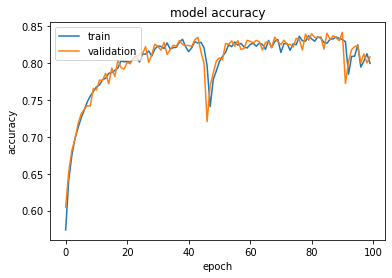

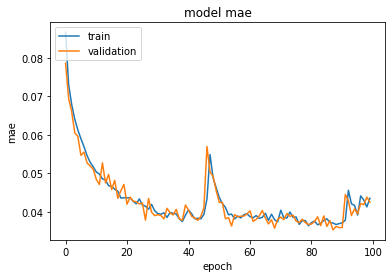

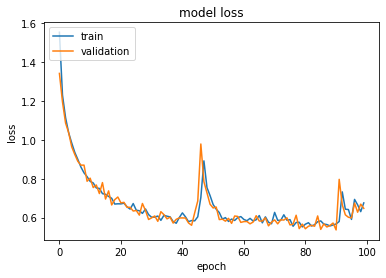

63/63 [==============================] - 0s 6ms/step - loss: 0.6510 - mae: 0.0427 - accuracy: 0.8069

Evaluation:
Loss, MAE, Accuracy [0.6510234475135803, 0.04265466704964638, 0.8069484829902649]
[[109553    546    471    554    462    489    486    321    276    672
     407    384    445]
 [  2006   3502     58     81    324    176     87     88    144    323
      72     49    166]
 [   966     31   5137    184     98     57    115     18    111    182
      27    179    141]
 [  1537     33     24   4495    141     24     30     21    129    231
     137    273     36]
 [   742     69     27    102   5310    148     34     16     34    102
      71     59    373]
 [   947    115     35     44    596   5386     17     18    116    132
      47     48    158]
 [  1541    166    130    111    278    116   3063     42    174    224
     152    222    206]
 [  1023     46     16     79    185     27     33   5222     41     78
      44     83     72]
 [  1227    106    112    206    530

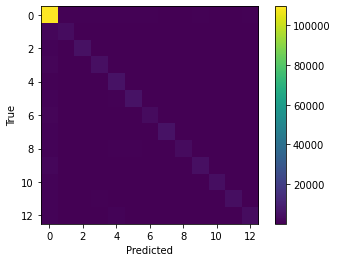

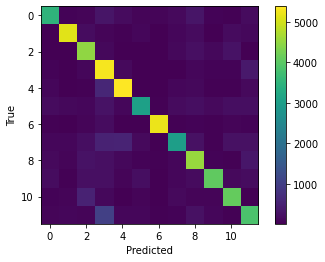

PSDS (0.25774952919161626, 'Valid file')



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv
Filling post processing used.
[[110138    443    442    446    466    463    434    304    239    554
     385    342    410]
 [  2483   3673     59     47    212     68      7     54     48    279
      19     37     90]
 [  1122     10   5499    127     74     19     26      7     26     85
       9    115    127]
 [  1919     19      9   4680     83     28      0     10     89     98
      80     77     19]
 [   969     19     10     61   5619     76      1      2     19     35
      27     45    204]
 [  1082     37      9     19    402   5889      2      4     39     37
      19     10    110]
 [  2012     61     60     75    144     62   3507     44     65    145
      36    116     98]
 [  1076      7      8     42    129      9     19   5521     20     52
      12     41     13]
 [  1559     25     35    156    525    462     42      0   3315    215
      13    201    218]
 [  2301     52     20    205    116     36     28    

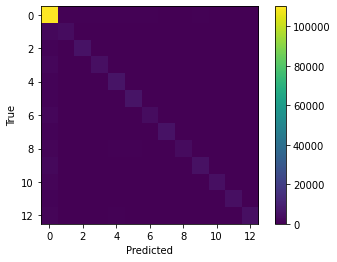

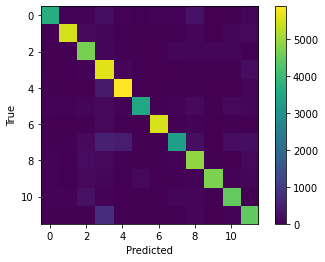

PSDS (nan, "Each file needs to have at least one label. 16 file(s) missing, e.g. ['09937_mix.wav', '04873_mix.wav', '06014_mix.wav']")


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv.pp.csv


In [15]:
pipe_param = {'data_folder': '/content/drive/MyDrive/Colab Notebooks/data/',
              'wav_files_folder': 'final_pre_dataset',
              'frame_size': 0.2, 'frame_stride': 0.098,
              'mel_filter': 32, 'nfft': 512,
              'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren moechte
              'eval_csv': 'challenge_filelist_dummy.csv',
              'scaling': 'standard', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
              'test_split_range': (8000, -1), # index anfang und ende aus dev set 
              'prediction_path': './', # wo prediction csvs gespeichert werden sollen
              'post_processing': 'fill', # 'fill' is das von Jannes.
              'post_timethres': 0.8, # post processing parameter
              'post_noisethres': 0.3,
              'post_base': 2,
              'submission_file_path': './challenge_submission.csv'}

model_param = {'layers': [100, 100],
               'cell_type': 'gru',
               'dilation_rates': (1, 2),
               'conv_filter': 32,
               'conv_kernel_size': 2,
               'val_split_range': (6400, -1), # 0.2
               'loss': 'categorical_crossentropy', # bbdc.dice_loss moeglich
               'learning_rate': 0.01,
               'batch_size': 256,
               'epochs': 100,
               'model_save_path': './',
               'load_path': None} # Wenn trainiert werden soll: None; Submission 1: 'model9561.h5'

pipeline_rnn_1(pipe_param, model_param)

Mel filter version loading block.
Csv from wav files already existend. Skipping calc_fft_mel.
Scaled numpy files already existend. Skipping scaling and load_data function.
Splitting test set at indices 8000 to -1 from dev set.
Existing model.h5 removed.
Tensorflow version: 2.4.1
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 100, 32)]         0         
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 100, 32

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


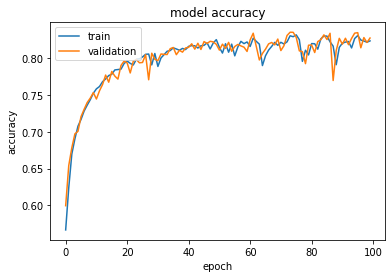

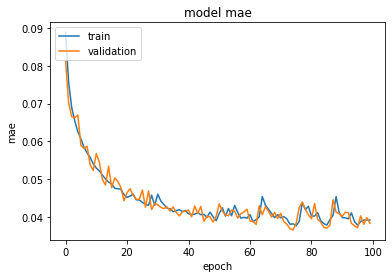

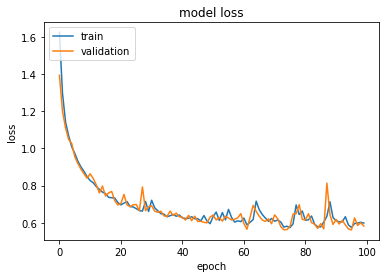

63/63 [==============================] - 0s 5ms/step - loss: 0.5837 - mae: 0.0384 - accuracy: 0.8271

Evaluation:
Loss, MAE, Accuracy [0.5837472677230835, 0.038423605263233185, 0.8271235823631287]
[[109307    488    333    497    246    392    294    282    413    380
     576    571    427]
 [  1946   3907    106     86    182    189    136     45    163    169
     226     93    284]
 [   832     39   5077     78     27     30     53     16    120     72
      36    264     87]
 [  1380     37     27   4442     53      7     14     15     55     73
     153    589     31]
 [   852     94     23    125   5185    163     42     21     95     86
     132    114    785]
 [   793     76     75     70    202   5284     15      5    301     69
      44     44     86]
 [  1884    115    110     98     95     66   3638     40    189    143
     329    267    326]
 [  1048     32     22     62     78     27     40   5791     23     70
      39    119    264]
 [  1135    109     97    181    20

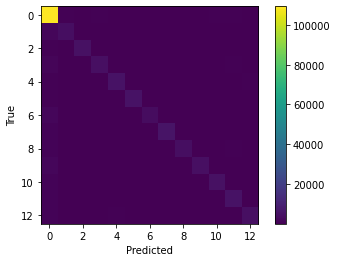

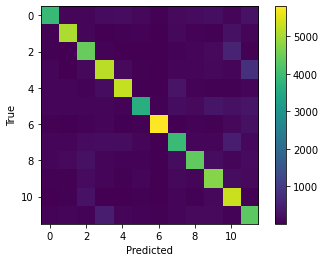

PSDS (0.3222893877894278, 'Valid file')



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv
Filling post processing used.
[[109826    413    331    405    230    358    257    273    354    277
     508    574    400]
 [  2544   4167     64     30     70     99     56     10     61     83
     144     28    176]
 [   906     36   5364     20     18     29      9      3     59     11
       5    239     32]
 [  1759     20      0   4730     28      0      0      0     13      0
      66    250     10]
 [   970     71      8    109   5680    112      9      8     33     25
      64     76    552]
 [   956     45     33     52     90   5669      0      0    163      9
       1     18     28]
 [  2344     88     18     33     29      0   4089      9    109     24
     261    127    169]
 [  1150      2      0     17     97     16     13   6051     10     21
      21     72    145]
 [  1482     33     44    107    142    160     18      0   4239      6
       8    449     63]
 [  2217     28     96    174     36     14     28    

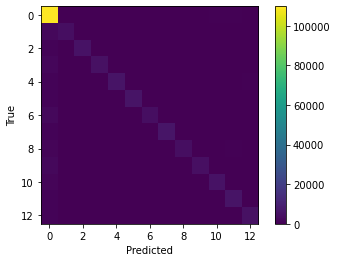

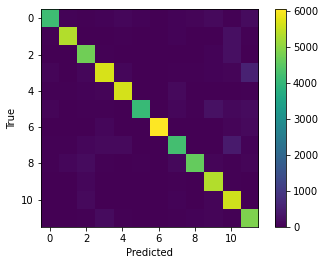

PSDS (nan, "Each file needs to have at least one label. 23 file(s) missing, e.g. ['09937_mix.wav', '06120_mix.wav', '06956_mix.wav']")


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv.pp.csv


In [16]:
pipe_param = {'data_folder': '/content/drive/MyDrive/Colab Notebooks/data/',
              'wav_files_folder': 'final_pre_dataset',
              'frame_size': 0.2, 'frame_stride': 0.098,
              'mel_filter': 32, 'nfft': 512,
              'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren moechte
              'eval_csv': 'challenge_filelist_dummy.csv',
              'scaling': 'standard', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
              'test_split_range': (8000, -1), # index anfang und ende aus dev set 
              'prediction_path': './', # wo prediction csvs gespeichert werden sollen
              'post_processing': 'fill', # 'fill' is das von Jannes.
              'post_timethres': 0.8, # post processing parameter
              'post_noisethres': 0.3,
              'post_base': 2,
              'submission_file_path': './challenge_submission.csv'}

model_param = {'layers': [100],
               'cell_type': 'gru',
               'dilation_rates': (1, 2),
               'conv_filter': 32,
               'conv_kernel_size': 2,
               'val_split_range': (6400, -1), # 0.2
               'loss': 'categorical_crossentropy', # bbdc.dice_loss moeglich
               'learning_rate': 0.01,
               'batch_size': 256,
               'epochs': 100,
               'model_save_path': './',
               'load_path': None} # Wenn trainiert werden soll: None; Submission 1: 'model9561.h5'

pipeline_rnn_1(pipe_param, model_param)

Mel filter version loading block.
Csv from wav files already existend. Skipping calc_fft_mel.
Scaled numpy files already existend. Skipping scaling and load_data function.
Splitting test set at indices 8000 to -1 from dev set.
Existing model.h5 removed.
Tensorflow version: 2.4.1
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 100, 32)]         0         
_________________________________________________________________
conv1d_36 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 100, 32

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


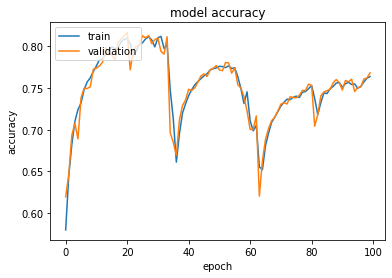

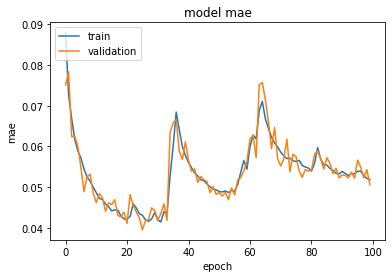

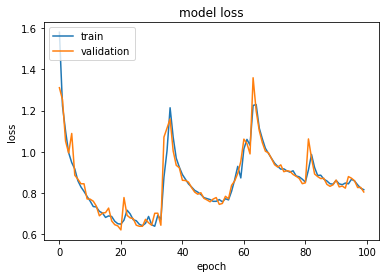

63/63 [==============================] - 0s 5ms/step - loss: 0.8139 - mae: 0.0509 - accuracy: 0.7652

Evaluation:
Loss, MAE, Accuracy [0.8139406442642212, 0.05093986913561821, 0.7651525735855103]
[[106139    917    776    887    751    569    811    815    443    740
     802    467    548]
 [  2202   3186    160     61    337    102    365    128    159    217
     205     31    174]
 [   994     24   5734    161     35     12    129     26    106     65
      12    189     49]
 [  1768     14     67   3940    126     56     99     23     58    116
     182    362     36]
 [   970    128     69     89   4721    146    163     25    106    110
      60     51    748]
 [  1165    156    109     37    516   4141     99     26    229     97
      21      6    177]
 [  2121    265    292     84    183     71   3480     88    149    169
     238    102    239]
 [   879     98    120     87     75     24     70   5377     10     45
      65     67    118]
 [  1780    144    310    351    254

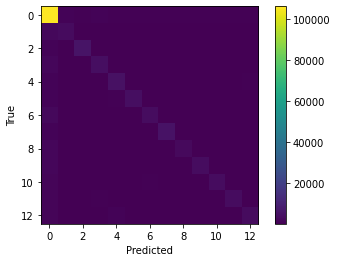

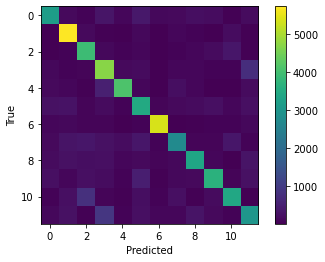

PSDS (0.16909302164915807, 'Valid file')



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv
Filling post processing used.
[[107382    752    720    743    684    494    686    737    347    592
     683    415    430]
 [  2578   3453    108     19    177     19    288    107    130    199
     155      9     85]
 [  1099     15   5926    138     25      1     38      1     59     26
      12    180     16]
 [  2090     11     31   4145    106     45     68      2     24     74
      94    129     28]
 [  1168     69     69     60   5120     99     72      0     71     61
      23     10    564]
 [  1381     69     77      1    321   4442     36     21    187     67
       0      0    177]
 [  2502    232     85     49     97     18   3948     61     49    110
     109     69    152]
 [   957     43    119     28     52     10     29   5658      5     21
      24     50     39]
 [  2366     90    120    325    193     93    197     62   2905     48
       9    361     38]
 [  2590     90    131     94    124     35    110    

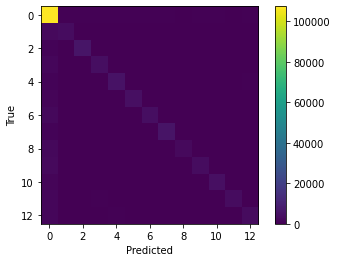

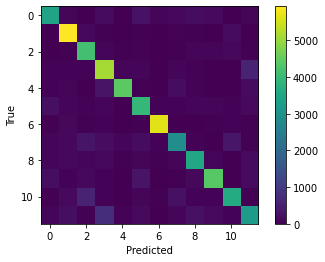

PSDS (nan, "Each file needs to have at least one label. 15 file(s) missing, e.g. ['00580_mix.wav', '04821_mix.wav', '04010_mix.wav']")


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv.pp.csv


In [17]:
pipe_param = {'data_folder': '/content/drive/MyDrive/Colab Notebooks/data/',
              'wav_files_folder': 'final_pre_dataset',
              'frame_size': 0.2, 'frame_stride': 0.098,
              'mel_filter': 32, 'nfft': 512,
              'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren moechte
              'eval_csv': 'challenge_filelist_dummy.csv',
              'scaling': 'standard', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
              'test_split_range': (8000, -1), # index anfang und ende aus dev set 
              'prediction_path': './', # wo prediction csvs gespeichert werden sollen
              'post_processing': 'fill', # 'fill' is das von Jannes.
              'post_timethres': 0.8, # post processing parameter
              'post_noisethres': 0.3,
              'post_base': 2,
              'submission_file_path': './challenge_submission.csv'}

model_param = {'layers': [200],
               'cell_type': 'gru',
               'dilation_rates': (1, 2),
               'conv_filter': 32,
               'conv_kernel_size': 2,
               'val_split_range': (6400, -1), # 0.2
               'loss': 'categorical_crossentropy', # bbdc.dice_loss moeglich
               'learning_rate': 0.01,
               'batch_size': 256,
               'epochs': 100,
               'model_save_path': './',
               'load_path': None} # Wenn trainiert werden soll: None; Submission 1: 'model9561.h5'

pipeline_rnn_1(pipe_param, model_param)

Mel filter version loading block.
Csv from wav files already existend. Skipping calc_fft_mel.
Scaled numpy files already existend. Skipping scaling and load_data function.
Splitting test set at indices 8000 to -1 from dev set.
Existing model.h5 removed.
Tensorflow version: 2.4.1
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 100, 32)]         0         
_________________________________________________________________
conv1d_40 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_41 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_42 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 100, 32

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


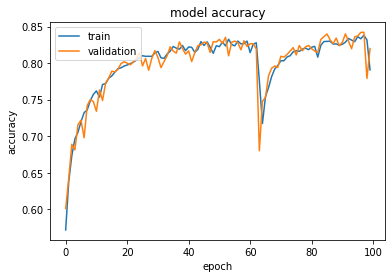

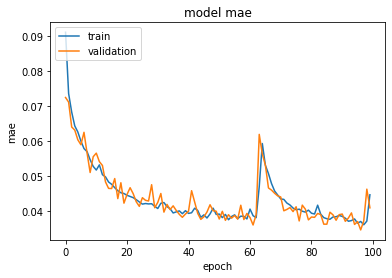

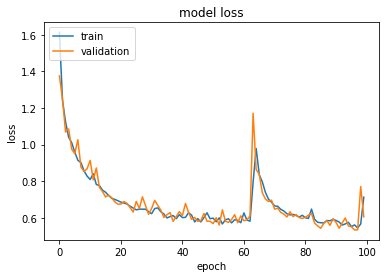

63/63 [==============================] - 0s 7ms/step - loss: 0.6043 - mae: 0.0409 - accuracy: 0.8203

Evaluation:
Loss, MAE, Accuracy [0.6042648553848267, 0.040862634778022766, 0.8203001618385315]
[[109794    863    341    561    287    271    555    335    496    585
     461    394    313]
 [  1583   4319    115     55    139    120    182     43    172    206
     195     75    135]
 [   827     53   5477     87     35     35    116      1    197    154
      43    104     70]
 [  1259    131     59   4392     72      4     60      7    111    132
     160    390     26]
 [   806    240     49     38   5095    116    100     14    301    113
      96    137    381]
 [  1060    235     62     25    290   5054     50     14    516    274
      66     22     77]
 [  1303    253    146     59     55     62   3407     12    300     97
     196    176    101]
 [   972    218     25     86     54     70     61   5566     83     67
      31    130    167]
 [  1122    179    181    174    18

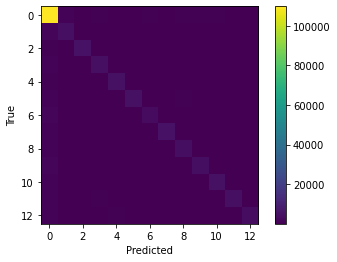

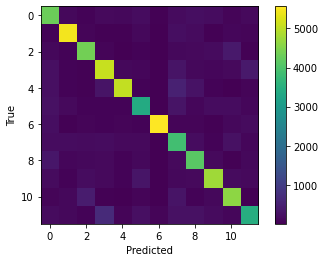

PSDS (0.2970082938964243, 'Valid file')



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv
Filling post processing used.
[[110358    708    320    512    278    230    452    331    466    498
     433    376    294]
 [  1904   4573     73     14     27     33    147     21    123    154
     176     41     53]
 [   968      9   5825     12      0     15     31      0    121     99
      10     60     49]
 [  1535     91      9   4690     49      0     15      0     55     52
     110    172     25]
 [  1024    169     45     16   5524     30     29     10    191     41
      27    102    278]
 [  1386     79     10      0    182   5387     10      1    417    218
      28      1     26]
 [  1597    161     26     30      0     39   3817      0    187     27
     121     58    104]
 [  1198    156      5     18     54     50     47   5783     59     49
      10     60     41]
 [  1379    120     88     70    121     45     16      0   4313    131
      15    222     85]
 [  1902    205     39     83     69      0     77    

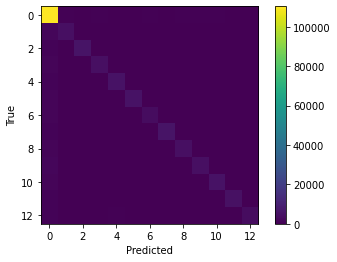

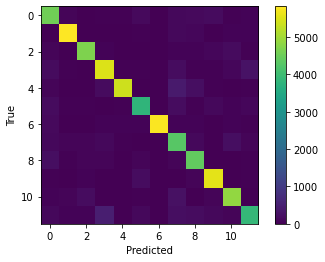

PSDS (nan, "Each file needs to have at least one label. 19 file(s) missing, e.g. ['06956_mix.wav', '06763_mix.wav', '08378_mix.wav']")


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv.pp.csv


In [18]:
pipe_param = {'data_folder': '/content/drive/MyDrive/Colab Notebooks/data/',
              'wav_files_folder': 'final_pre_dataset',
              'frame_size': 0.2, 'frame_stride': 0.098,
              'mel_filter': 32, 'nfft': 512,
              'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren moechte
              'eval_csv': 'challenge_filelist_dummy.csv',
              'scaling': 'standard', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
              'test_split_range': (8000, -1), # index anfang und ende aus dev set 
              'prediction_path': './', # wo prediction csvs gespeichert werden sollen
              'post_processing': 'fill', # 'fill' is das von Jannes.
              'post_timethres': 0.8, # post processing parameter
              'post_noisethres': 0.3,
              'post_base': 2,
              'submission_file_path': './challenge_submission.csv'}

model_param = {'layers': [32, 64, 90],
               'cell_type': 'gru',
               'dilation_rates': (1, 2),
               'conv_filter': 32,
               'conv_kernel_size': 2,
               'val_split_range': (6400, -1), # 0.2
               'loss': 'categorical_crossentropy', # bbdc.dice_loss moeglich
               'learning_rate': 0.01,
               'batch_size': 256,
               'epochs': 100,
               'model_save_path': './',
               'load_path': None} # Wenn trainiert werden soll: None; Submission 1: 'model9561.h5'

pipeline_rnn_1(pipe_param, model_param)

Mel filter version loading block.
Csv from wav files already existend. Skipping calc_fft_mel.
Scaled numpy files already existend. Skipping scaling and load_data function.
Splitting test set at indices 8000 to -1 from dev set.
Existing model.h5 removed.
Tensorflow version: 2.4.1
Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 100, 32)]         0         
_________________________________________________________________
conv1d_44 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_46 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_47 (Conv1D)           (None, 100, 3

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


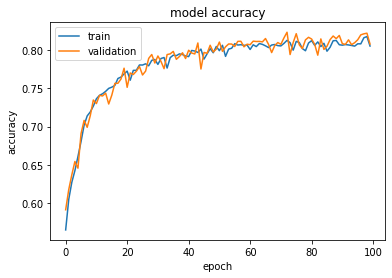

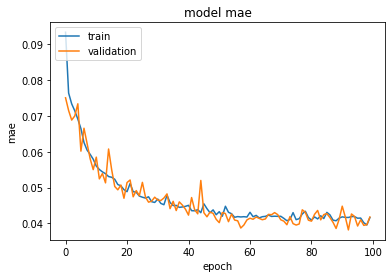

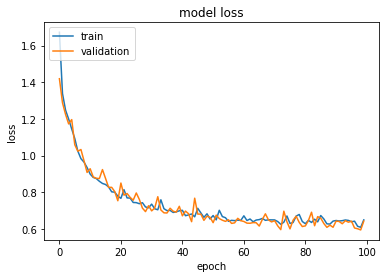

63/63 [==============================] - 1s 11ms/step - loss: 0.6487 - mae: 0.0420 - accuracy: 0.8061

Evaluation:
Loss, MAE, Accuracy [0.648685872554779, 0.04199491813778877, 0.8060880303382874]
[[109278    651    394    601    285    398    642    362    435    755
     255    650    209]
 [  1747   4307    112     85    211    150    190     62    249    371
     115     77    164]
 [   805     27   5392     98     36     23    122      4    184     98
       8    155     51]
 [  1407     46     90   4435    126     10    166     12    138    193
     106    630     38]
 [   672    123     68     42   4605    253    178     17    116    154
      56    118    252]
 [   967     70     76     42    208   5188     88     28    183    222
      33     30    100]
 [  1322    217    214     81    103     87   3656     22    241    261
      74    184    122]
 [   814     82     67    174     80     72     66   5492     90     78
      42    157     72]
 [  1175    158    288    183    291

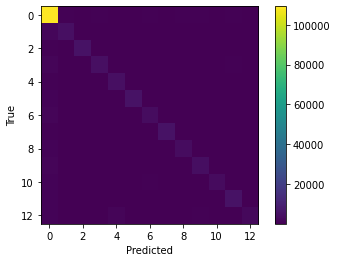

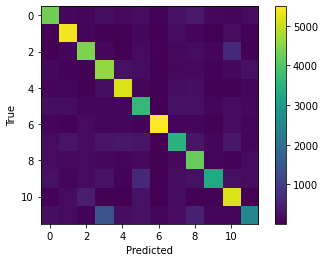

PSDS (0.22482806203659617, 'Valid file')



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv
Filling post processing used.
[[109751    535    380    556    309    384    544    359    361    712
     235    633    156]
 [  2095   4601     40     69    124     93    120     19    184    352
      58     44     41]
 [   850      9   5731     70      1     19     43      2    119     32
      10     88     29]
 [  1749     55     10   4716    127      7     75      2     67    110
      44    408     27]
 [   791     72     21     29   5112    170     79      0     73     97
      47     93     70]
 [  1171     20     36     34     38   5661     10     18    101    137
       0      9      0]
 [  1691    137     80     15     51     32   4134     25    145    112
      27    105     30]
 [   896     22     30    107     55     75     29   5890     67      7
      14     83     11]
 [  1480     72    168    112    263    294    138      0   4090    122
      34    292     28]
 [  1661     70     35     98     59     18     99    

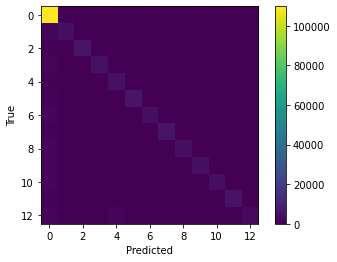

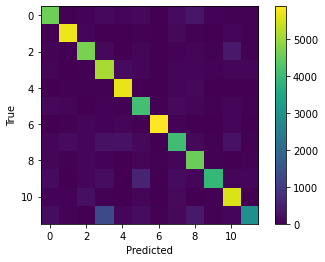

PSDS (nan, "Each file needs to have at least one label. 5 file(s) missing, e.g. ['02182_mix.wav', '09133_mix.wav', '03656_mix.wav']")


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv.pp.csv


In [19]:
pipe_param = {'data_folder': '/content/drive/MyDrive/Colab Notebooks/data/',
              'wav_files_folder': 'final_pre_dataset',
              'frame_size': 0.2, 'frame_stride': 0.098,
              'mel_filter': 32, 'nfft': 512,
              'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren moechte
              'eval_csv': 'challenge_filelist_dummy.csv',
              'scaling': 'standard', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
              'test_split_range': (8000, -1), # index anfang und ende aus dev set 
              'prediction_path': './', # wo prediction csvs gespeichert werden sollen
              'post_processing': 'fill', # 'fill' is das von Jannes.
              'post_timethres': 0.8, # post processing parameter
              'post_noisethres': 0.3,
              'post_base': 2,
              'submission_file_path': './challenge_submission.csv'}

model_param = {'layers': [100, 50, 20, 50, 100],
               'cell_type': 'gru',
               'dilation_rates': (1, 2),
               'conv_filter': 32,
               'conv_kernel_size': 2,
               'val_split_range': (6400, -1), # 0.2
               'loss': 'categorical_crossentropy', # bbdc.dice_loss moeglich
               'learning_rate': 0.01,
               'batch_size': 256,
               'epochs': 100,
               'model_save_path': './',
               'load_path': None} # Wenn trainiert werden soll: None; Submission 1: 'model9561.h5'

pipeline_rnn_1(pipe_param, model_param)

Mel filter version loading block.
Csv from wav files already existend. Skipping calc_fft_mel.
Scaled numpy files already existend. Skipping scaling and load_data function.
Splitting test set at indices 8000 to -1 from dev set.
Existing model.h5 removed.
Tensorflow version: 2.4.1
Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 100, 32)]         0         
_________________________________________________________________
conv1d_48 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_50 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_51 (Conv1D)           (None, 100, 3

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


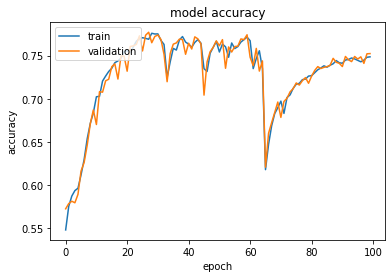

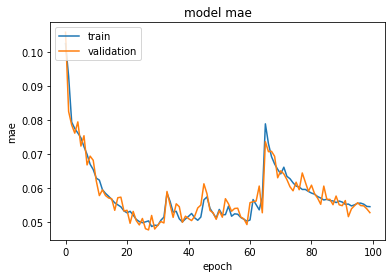

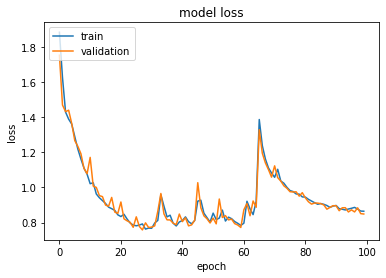

63/63 [==============================] - 1s 9ms/step - loss: 0.8425 - mae: 0.0525 - accuracy: 0.7543

Evaluation:
Loss, MAE, Accuracy [0.8424549698829651, 0.052483852952718735, 0.7542571425437927]
[[107993    435    279    806    657    646    428    566    640    766
     885    387    207]
 [  2447   2172     49    124    280    247    194     48    416    268
     310    140    130]
 [  1294     20   3872    269     24    106    202     98    298    354
      48    322    135]
 [  1822      7      0   3557     89     18     35     14     50    201
     319    560      9]
 [  1234    146     10    173   4545    251     73     47    198     99
     230    133    403]
 [  1158     80     42     39    303   4768     32     27    566    137
      34     25     79]
 [  2133    180     44    136     94     27   2513     31    477    174
     571    323    150]
 [  1315     37     24    103     72     46    147   5617     68     46
      43     89    148]
 [  1806     60     20    422    21

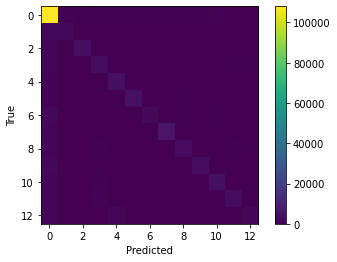

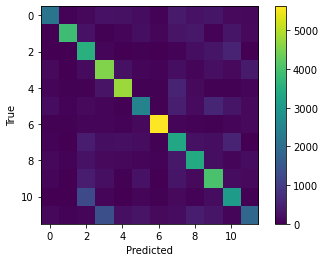

PSDS (0.16586835036876338, 'Valid file')



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv
Filling post processing used.
[[109168    354    258    607    611    602    331    511    480    523
     710    368    172]
 [  3127   2226     11     93    140    102    131     22    339    215
     239    114     66]
 [  1623      0   3953    223     14    103     56    105    250    197
      31    358    129]
 [  2177     20      1   3526     83     13     37     12     39    138
     279    356      0]
 [  1513    104      0    131   4929    169     39      0    128     32
     121     91    285]
 [  1367      4     11     25    144   5054     10      9    545     63
       1     20     37]
 [  2729    130     10     85     45      7   2766      4    214     83
     501    183     96]
 [  1560     20      9     30     35     27     93   5826     50     31
      16     25     33]
 [  2411     13      0    313    192    187     47      6   3435    152
     111    446      0]
 [  2756     90      4    212     42     61     65    

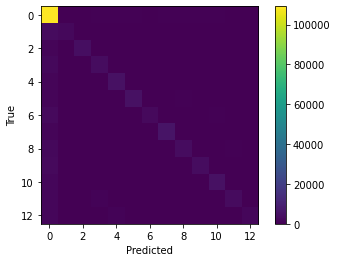

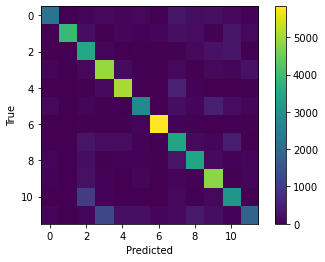

PSDS (nan, "Each file needs to have at least one label. 23 file(s) missing, e.g. ['01665_mix.wav', '08962_mix.wav', '00731_mix.wav']")


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv.pp.csv


In [20]:
pipe_param = {'data_folder': '/content/drive/MyDrive/Colab Notebooks/data/',
              'wav_files_folder': 'final_pre_dataset',
              'frame_size': 0.2, 'frame_stride': 0.098,
              'mel_filter': 32, 'nfft': 512,
              'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren moechte
              'eval_csv': 'challenge_filelist_dummy.csv',
              'scaling': 'standard', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
              'test_split_range': (8000, -1), # index anfang und ende aus dev set 
              'prediction_path': './', # wo prediction csvs gespeichert werden sollen
              'post_processing': 'fill', # 'fill' is das von Jannes.
              'post_timethres': 0.8, # post processing parameter
              'post_noisethres': 0.3,
              'post_base': 2,
              'submission_file_path': './challenge_submission.csv'}

model_param = {'layers': [200, 100, 100],
               'cell_type': 'gru',
               'dilation_rates': (1, 2),
               'conv_filter': 32,
               'conv_kernel_size': 2,
               'val_split_range': (6400, -1), # 0.2
               'loss': 'categorical_crossentropy', # bbdc.dice_loss moeglich
               'learning_rate': 0.01,
               'batch_size': 256,
               'epochs': 100,
               'model_save_path': './',
               'load_path': None} # Wenn trainiert werden soll: None; Submission 1: 'model9561.h5'

pipeline_rnn_1(pipe_param, model_param)

Mel filter version loading block.
Csv from wav files already existend. Skipping calc_fft_mel.
Scaled numpy files already existend. Skipping scaling and load_data function.
Splitting test set at indices 8000 to -1 from dev set.
Existing model.h5 removed.
Tensorflow version: 2.4.1
Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 100, 32)]         0         
_________________________________________________________________
conv1d_68 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_69 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_70 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_71 (Conv1D)           (None, 100, 3

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


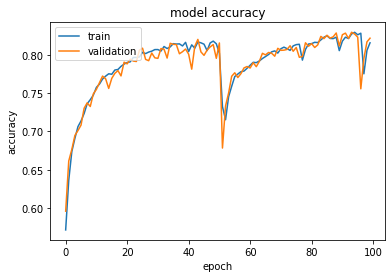

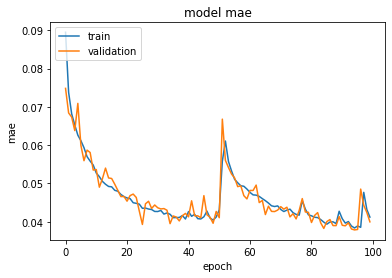

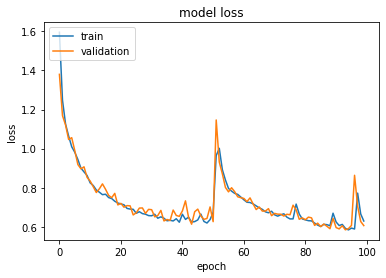

63/63 [==============================] - 0s 6ms/step - loss: 0.6055 - mae: 0.0399 - accuracy: 0.8222

Evaluation:
Loss, MAE, Accuracy [0.6054665446281433, 0.039921779185533524, 0.822231113910675]
[[110290    634    382    279    266    402    516    275    342    435
     417    248    348]
 [  2174   4387     74     37    107    224     83     86    152    123
     113     62    152]
 [   834     61   5642     59     19     98     88     33    162     96
      20     64     54]
 [  1707     93     84   3584    172     26     54     15    124    109
     240    593     47]
 [   903    302     19     11   5029    359     61     32    182     52
      39     50    509]
 [   897    145     19      8    148   5335     39     25    150     33
      21     15     91]
 [  1769    365     52     40    110    108   3644     20    227     99
     247    130    181]
 [  1093     87     18     31     21     33     38   5976     27     35
      63     40    118]
 [  1414    202     76     82    180

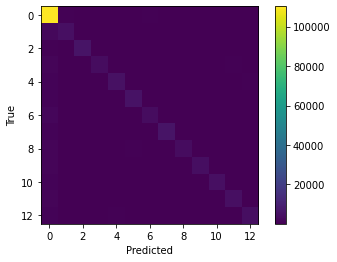

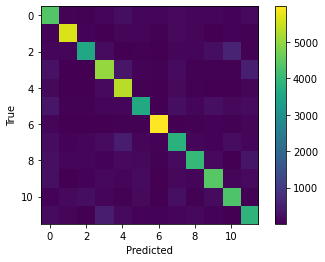

PSDS (0.33492664078122614, 'Valid file')



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv
Filling post processing used.
[[111019    399    385    221    259    326    451    280    261    330
     349    238    316]
 [  2820   4490      1     17     46     70     31     37     91     44
      53      6     68]
 [  1058     31   5866     44      5     63      0     17     70     36
      10     16     14]
 [  2346     62     25   3671    133      8     43      9     59      0
     134    323     35]
 [  1214    155      9      0   5504    187     26      0    103     13
      10      9    318]
 [  1145     36      9      0     68   5464     13     32    102      4
       0      0     53]
 [  2338    156     18     26     36     24   3939      0     72     43
     156     96     88]
 [  1324      9      5      0      0      8     17   6101     15     16
      33      3     49]
 [  1955     80     34     26    112    322     15     35   3972     67
       9    187     35]
 [  2162    119     79     52     11     62     70    

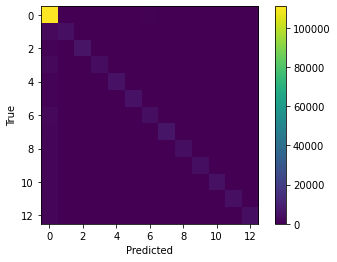

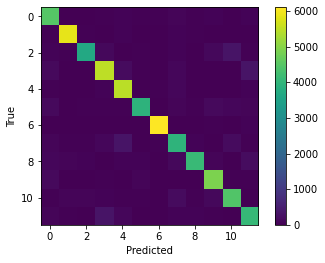

PSDS (nan, "Each file needs to have at least one label. 26 file(s) missing, e.g. ['09783_mix.wav', '05185_mix.wav', '06763_mix.wav']")


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv.pp.csv


In [25]:
pipe_param = {'data_folder': '/content/drive/MyDrive/Colab Notebooks/data/',
              'wav_files_folder': 'final_pre_dataset',
              'frame_size': 0.2, 'frame_stride': 0.098,
              'mel_filter': 32, 'nfft': 512,
              'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren moechte
              'eval_csv': 'challenge_filelist_dummy.csv',
              'scaling': 'standard', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
              'test_split_range': (8000, -1), # index anfang und ende aus dev set 
              'prediction_path': './', # wo prediction csvs gespeichert werden sollen
              'post_processing': 'fill', # 'fill' is das von Jannes.
              'post_timethres': 0.8, # post processing parameter
              'post_noisethres': 0.3,
              'post_base': 2,
              'submission_file_path': './challenge_submission.csv'}

model_param = {'layers': [32, 100],
               'cell_type': 'gru',
               'dilation_rates': (1, 2),
               'conv_filter': 32,
               'conv_kernel_size': 2,
               'val_split_range': (6400, -1), # 0.2
               'loss': 'categorical_crossentropy', # bbdc.dice_loss moeglich
               'learning_rate': 0.01,
               'batch_size': 256,
               'epochs': 100,
               'model_save_path': './',
               'load_path': None} # Wenn trainiert werden soll: None; Submission 1: 'model9561.h5'

pipeline_rnn_1(pipe_param, model_param)

Mel filter version loading block.
Csv from wav files already existend. Skipping calc_fft_mel.
Scaled numpy files already existend. Skipping scaling and load_data function.
Splitting test set at indices 8000 to -1 from dev set.
Existing model.h5 removed.
Tensorflow version: 2.4.1
Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 100, 32)]         0         
_________________________________________________________________
conv1d_72 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_73 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_74 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_75 (Conv1D)           (None, 100, 3

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


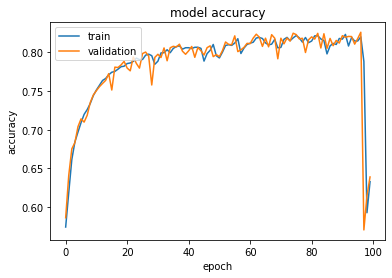

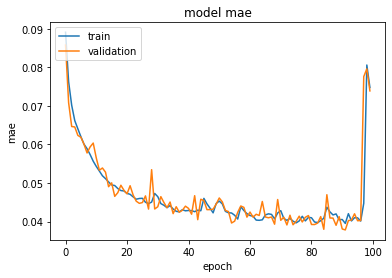

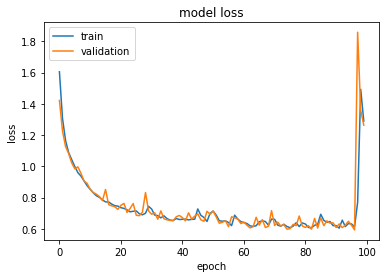

63/63 [==============================] - 0s 6ms/step - loss: 1.2634 - mae: 0.0740 - accuracy: 0.6386

Evaluation:
Loss, MAE, Accuracy [1.2633782625198364, 0.07400809228420258, 0.6386393308639526]
[[110221    126    517    225    749    894     70    891    295    783
      81     54      8]
 [  4207    442    157     47    120    601    209    721    365    603
     100     10     27]
 [  2061     27   3514     97     66    175     78    211    137    568
       6     23     31]
 [  3581     21    329   1294    246     70     46    220     44    965
     123     90      6]
 [  1562     29     75     28   2955   1213     39    445     31    650
      21      3     21]
 [  2630     48     48     42    735   2915     61    417    231    858
      25      2     27]
 [  3827    200    235     71    101    297    479    319    428    664
     190     40     18]
 [  2383     34    122    418    124    262     27   2775    175    336
      35     60     17]
 [  3204    144    279    201    245

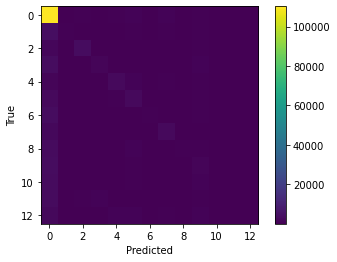

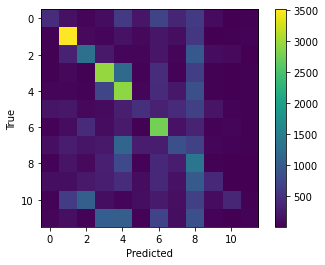

PSDS (0.017335678143981705, 'Valid file')



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv
Filling post processing used.
[[111956     38    415    116    500    652     11    592    181    383
      29     38      3]
 [  5597    331    122     28     91    347     57    544    252    212
      20      8      0]
 [  2866     18   3503     27      0     92      0     95     79    277
       0     20     17]
 [  4812      0    142   1012    164     64      0     73     18    654
      21     75      0]
 [  1966      0     23      0   3349   1140      0    353      0    241
       0      0      0]
 [  3403      7      9     12    538   2988      0    446    163    443
       0      0     30]
 [  5481     78    103     19     53    145    140    123    274    377
      57     19      0]
 [  3067      8     81    259     80    192      0   2811     94    143
       0     33      0]
 [  4182     21    226    130    223   1117     68    182    894    368
       0     42      9]
 [  5251     10    106      9     95    580     21    

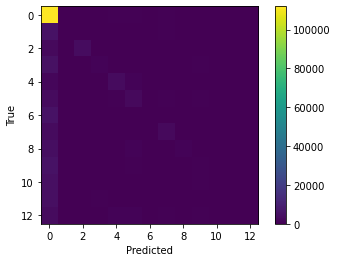

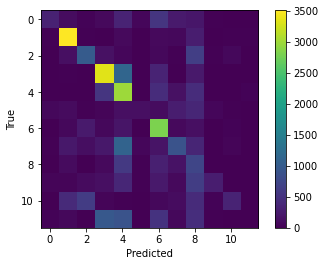

PSDS (nan, "Each file needs to have at least one label. 177 file(s) missing, e.g. ['09025_mix.wav', '00026_mix.wav', '02624_mix.wav']")


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv.pp.csv


In [26]:
pipe_param = {'data_folder': '/content/drive/MyDrive/Colab Notebooks/data/',
              'wav_files_folder': 'final_pre_dataset',
              'frame_size': 0.2, 'frame_stride': 0.098,
              'mel_filter': 32, 'nfft': 512,
              'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren moechte
              'eval_csv': 'challenge_filelist_dummy.csv',
              'scaling': 'standard', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
              'test_split_range': (8000, -1), # index anfang und ende aus dev set 
              'prediction_path': './', # wo prediction csvs gespeichert werden sollen
              'post_processing': 'fill', # 'fill' is das von Jannes.
              'post_timethres': 0.8, # post processing parameter
              'post_noisethres': 0.3,
              'post_base': 2,
              'submission_file_path': './challenge_submission.csv'}

model_param = {'layers': [32, 64],
               'cell_type': 'gru',
               'dilation_rates': (1, 2),
               'conv_filter': 32,
               'conv_kernel_size': 2,
               'val_split_range': (6400, -1), # 0.2
               'loss': 'categorical_crossentropy', # bbdc.dice_loss moeglich
               'learning_rate': 0.01,
               'batch_size': 256,
               'epochs': 100,
               'model_save_path': './',
               'load_path': None} # Wenn trainiert werden soll: None; Submission 1: 'model9561.h5'

pipeline_rnn_1(pipe_param, model_param)

Mel filter version loading block.
Csv from wav files already existend. Skipping calc_fft_mel.
Scaled numpy files already existend. Skipping scaling and load_data function.
Splitting test set at indices 8000 to -1 from dev set.
Existing model.h5 removed.
Tensorflow version: 2.4.1
Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 100, 32)]         0         
_________________________________________________________________
conv1d_76 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_77 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_78 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_79 (Conv1D)           (None, 100, 3

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


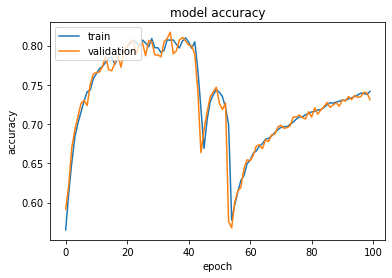

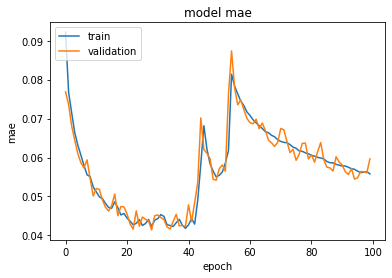

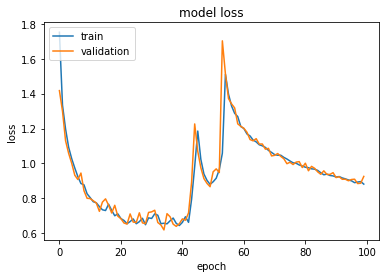

63/63 [==============================] - 0s 7ms/step - loss: 0.9245 - mae: 0.0595 - accuracy: 0.7326

Evaluation:
Loss, MAE, Accuracy [0.9244604110717773, 0.05945602059364319, 0.7325862646102905]
[[106540   1065    448    611    919   1440    389    737   1075    950
     345    237    291]
 [  1931   2927     48     54    404    682     36     35    398    398
      73     31    150]
 [   850     59   3949    144     92    148     70     59    761    120
       6     58    209]
 [  1878     83     71   3493    171    117     91     76    210    452
     191    270     61]
 [   690    151     26     27   4268   1002     42     29    228    199
      34     13    247]
 [   897     65     11     19    326   5744     22     14    449     97
      15      8     52]
 [  1968    640     60    119    293    340   1812     33    935    314
     257     85    186]
 [   926     53     16    111    127    127     30   5364    213    177
      29     41    186]
 [  1317    126    179    257    177

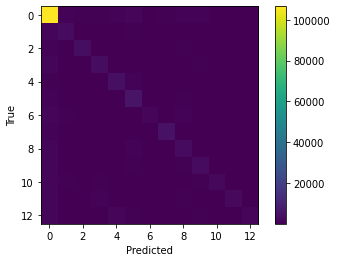

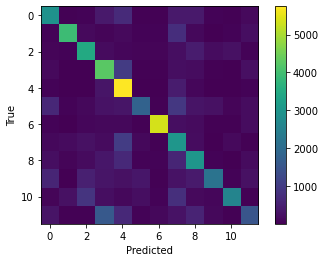

PSDS (0.12743550103861903, 'Valid file')



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv
Filling post processing used.
[[107903    815    438    498    828   1171    317    688    943    688
     263    240    255]
 [  2361   3055     44     24    300    515     10      6    360    371
      19     25     77]
 [   943     47   4250     68     79    119     34     53    650     66
       0     30    186]
 [  2330     90     42   3636    123     69     44     94    153    266
     144    124     49]
 [   842    126     17      0   4809    647     18     31    194    128
       0      0    144]
 [   984     13      0      2    195   6100     17      7    363     13
       0      9     16]
 [  2467    715      0     63    211    149   2085     21    699    274
     192     29    137]
 [  1105     20      0     17     86     92      3   5658    189    167
       8     12     43]
 [  1665     92    186    166    110    915     71     37   3166    140
       9    100     16]
 [  2518    106     17    100    284    381     56    

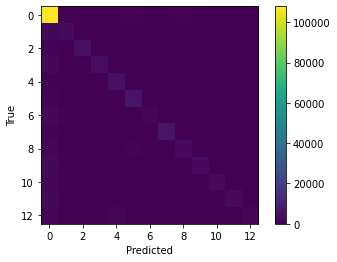

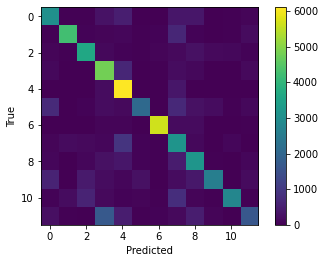

PSDS (nan, "Each file needs to have at least one label. 16 file(s) missing, e.g. ['09138_mix.wav', '05782_mix.wav', '03803_mix.wav']")


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv.pp.csv


In [27]:
pipe_param = {'data_folder': '/content/drive/MyDrive/Colab Notebooks/data/',
              'wav_files_folder': 'final_pre_dataset',
              'frame_size': 0.2, 'frame_stride': 0.098,
              'mel_filter': 32, 'nfft': 512,
              'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren moechte
              'eval_csv': 'challenge_filelist_dummy.csv',
              'scaling': 'standard', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
              'test_split_range': (8000, -1), # index anfang und ende aus dev set 
              'prediction_path': './', # wo prediction csvs gespeichert werden sollen
              'post_processing': 'fill', # 'fill' is das von Jannes.
              'post_timethres': 0.8, # post processing parameter
              'post_noisethres': 0.3,
              'post_base': 2,
              'submission_file_path': './challenge_submission.csv'}

model_param = {'layers': [32, 200],
               'cell_type': 'gru',
               'dilation_rates': (1, 2),
               'conv_filter': 32,
               'conv_kernel_size': 2,
               'val_split_range': (6400, -1), # 0.2
               'loss': 'categorical_crossentropy', # bbdc.dice_loss moeglich
               'learning_rate': 0.01,
               'batch_size': 256,
               'epochs': 100,
               'model_save_path': './',
               'load_path': None} # Wenn trainiert werden soll: None; Submission 1: 'model9561.h5'

pipeline_rnn_1(pipe_param, model_param)

# one layer diff size

Mel filter version loading block.
Csv from wav files already existend. Skipping calc_fft_mel.
Scaled numpy files already existend. Skipping scaling and load_data function.
Splitting test set at indices 8000 to -1 from dev set.
Existing model.h5 removed.
Tensorflow version: 2.4.1
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 100, 32)]         0         
_________________________________________________________________
conv1d_52 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_53 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_54 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_55 (Conv1D)           (None, 100, 3

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


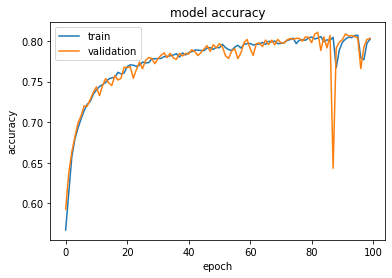

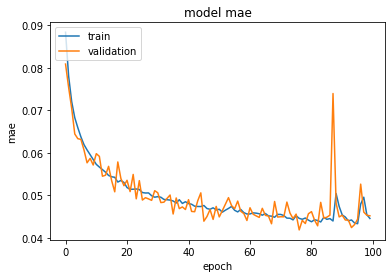

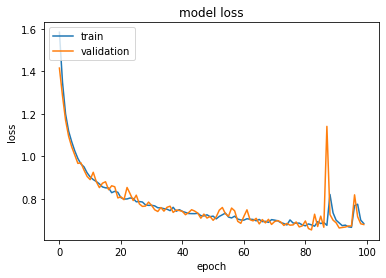

63/63 [==============================] - 0s 5ms/step - loss: 0.6860 - mae: 0.0455 - accuracy: 0.8014

Evaluation:
Loss, MAE, Accuracy [0.6859540939331055, 0.04553594812750816, 0.8014357089996338]
[[108501    627    499    820    501    365    368    595    540    669
     529    460    367]
 [  2042   3194    136     57    292    119    133    100    308    295
     301    109    110]
 [   872     14   5417    110     19     26     69     20    182     62
      14    297     42]
 [  1495     15     23   4230    107      2      6     24     79    105
     117    545      6]
 [  1017     97     61     98   5437     79     91     31    183     65
     148     98    468]
 [   877    138    113     70    353   4672     27     29    356    106
      39     38     34]
 [  1997    115    141    105    128     22   3046     61    203    146
     425    285    157]
 [   996     47     25     56     31     27     37   6020     14     14
      45     93     28]
 [  1329     57    271    178    287

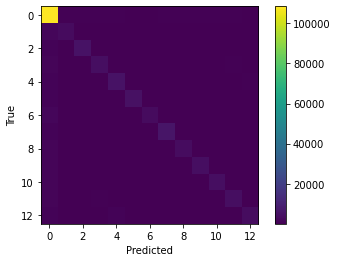

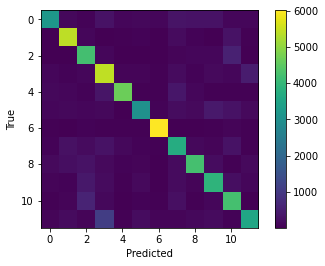

PSDS (0.2698719995221399, 'Valid file')



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv
Filling post processing used.
[[109630    461    451    624    438    302    323    532    411    501
     441    420    307]
 [  2734   3211    100     15    210     78     59     47    189    216
     243     70     24]
 [  1057     10   5598     32     18      9     26      4    128     21
       2    209     30]
 [  1858     16     17   4340    105      0      0      8     31     24
      55    297      3]
 [  1277     33     27     43   5876     43     43     10    104     26
      41     53    297]
 [  1176    106     61     44    253   4901      0      9    225     42
       0     26      9]
 [  2674     44     67     45     60      5   3229     17     76     81
     284    156     93]
 [  1214      9      9      4     14     19     18   6065      0      0
       7     64     10]
 [  1694     37    170    133    237     60      6     34   3868     70
      24    288     35]
 [  2184     94    127    244     94      0     50    

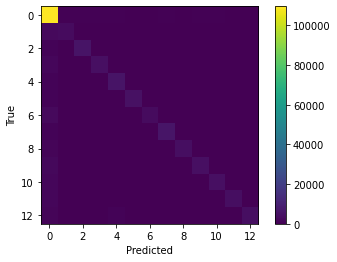

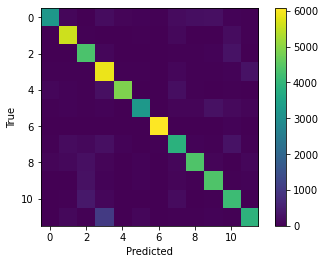

PSDS (nan, "Each file needs to have at least one label. 28 file(s) missing, e.g. ['00782_mix.wav', '08780_mix.wav', '04428_mix.wav']")


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv.pp.csv


In [21]:
pipe_param = {'data_folder': '/content/drive/MyDrive/Colab Notebooks/data/',
              'wav_files_folder': 'final_pre_dataset',
              'frame_size': 0.2, 'frame_stride': 0.098,
              'mel_filter': 32, 'nfft': 512,
              'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren moechte
              'eval_csv': 'challenge_filelist_dummy.csv',
              'scaling': 'standard', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
              'test_split_range': (8000, -1), # index anfang und ende aus dev set 
              'prediction_path': './', # wo prediction csvs gespeichert werden sollen
              'post_processing': 'fill', # 'fill' is das von Jannes.
              'post_timethres': 0.8, # post processing parameter
              'post_noisethres': 0.3,
              'post_base': 2,
              'submission_file_path': './challenge_submission.csv'}

model_param = {'layers': [20],
               'cell_type': 'gru',
               'dilation_rates': (1, 2),
               'conv_filter': 32,
               'conv_kernel_size': 2,
               'val_split_range': (6400, -1), # 0.2
               'loss': 'categorical_crossentropy', # bbdc.dice_loss moeglich
               'learning_rate': 0.01,
               'batch_size': 256,
               'epochs': 100,
               'model_save_path': './',
               'load_path': None} # Wenn trainiert werden soll: None; Submission 1: 'model9561.h5'

pipeline_rnn_1(pipe_param, model_param)

Mel filter version loading block.
Csv from wav files already existend. Skipping calc_fft_mel.
Scaled numpy files already existend. Skipping scaling and load_data function.
Splitting test set at indices 8000 to -1 from dev set.
Existing model.h5 removed.
Tensorflow version: 2.4.1
Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 100, 32)]         0         
_________________________________________________________________
conv1d_56 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_57 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_58 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_59 (Conv1D)           (None, 100, 3

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


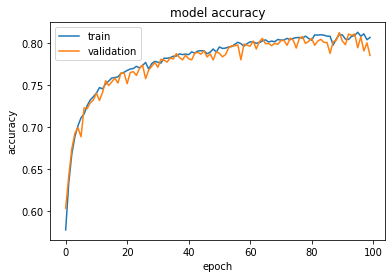

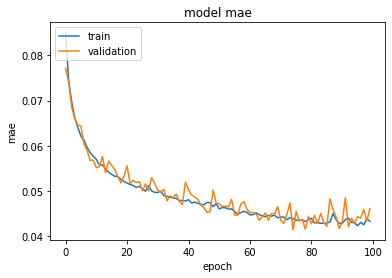

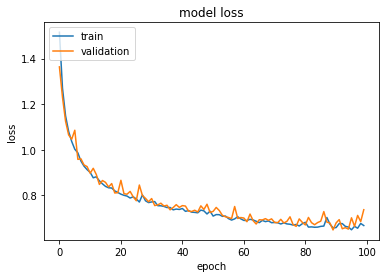

63/63 [==============================] - 0s 4ms/step - loss: 0.7351 - mae: 0.0461 - accuracy: 0.7846

Evaluation:
Loss, MAE, Accuracy [0.7351496815681458, 0.046102847903966904, 0.7846473455429077]
[[109312    789    352    439    207    667    246    501    808    626
     539    226    268]
 [  1888   3710    135     11    110    319     46     83    383    224
      55     30     80]
 [  1187     56   4185     51     12    336    170     82    448    309
      37     55     75]
 [  1677     49    143   3474    116    133     33     26    234    366
     191    323     12]
 [  1228    254     69     34   3316   1100     53     33    671    147
      51     40    315]
 [   915    120     26     18     46   5759     15     13    136     79
      11      6     31]
 [  2270    547    115     66    110    171   2642     60    544    304
     256     67    160]
 [   892     80     43     28     14     81     28   5607     62     21
      15     48     48]
 [  1322    121    144    100     7

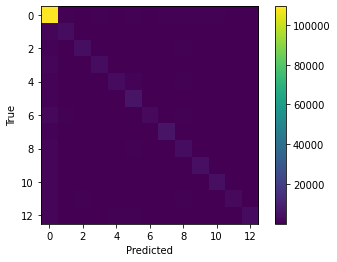

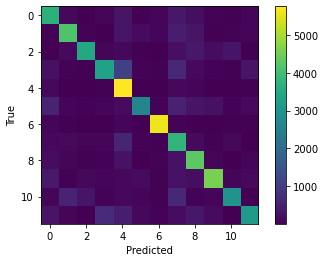

PSDS (0.20665914547792197, 'Valid file')



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv
Filling post processing used.
[[110249    563    312    353    167    595    203    472    630    503
     500    197    236]
 [  2420   3775    135      8     53    123     13     42    325    155
       9      0     16]
 [  1453     32   4449      0      0    309     27     70    356    238
      15     14     40]
 [  2121     30     94   3740     94     69      0      8    108    284
     144     85      0]
 [  1455    115     72      0   3667    932      9     16    739     97
      45     26    138]
 [  1007      0     10      0      0   6065      0      5     54     32
       2      0      0]
 [  2956    447     61     31     44     91   2874     45    304    233
     169      0     57]
 [   993     17     18      0      0     43      4   5824     37     10
       4     17      0]
 [  1601     46     82     60     37    489      0     23   3996    127
      14    116      0]
 [  2104    107     35     18     16    133      8    

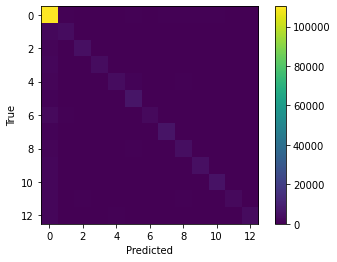

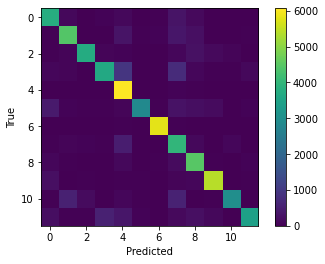

PSDS (nan, "Each file needs to have at least one label. 15 file(s) missing, e.g. ['06667_mix.wav', '03803_mix.wav', '09773_mix.wav']")


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv.pp.csv


In [22]:
pipe_param = {'data_folder': '/content/drive/MyDrive/Colab Notebooks/data/',
              'wav_files_folder': 'final_pre_dataset',
              'frame_size': 0.2, 'frame_stride': 0.098,
              'mel_filter': 32, 'nfft': 512,
              'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren moechte
              'eval_csv': 'challenge_filelist_dummy.csv',
              'scaling': 'standard', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
              'test_split_range': (8000, -1), # index anfang und ende aus dev set 
              'prediction_path': './', # wo prediction csvs gespeichert werden sollen
              'post_processing': 'fill', # 'fill' is das von Jannes.
              'post_timethres': 0.8, # post processing parameter
              'post_noisethres': 0.3,
              'post_base': 2,
              'submission_file_path': './challenge_submission.csv'}

model_param = {'layers': [32],
               'cell_type': 'gru',
               'dilation_rates': (1, 2),
               'conv_filter': 32,
               'conv_kernel_size': 2,
               'val_split_range': (6400, -1), # 0.2
               'loss': 'categorical_crossentropy', # bbdc.dice_loss moeglich
               'learning_rate': 0.01,
               'batch_size': 256,
               'epochs': 100,
               'model_save_path': './',
               'load_path': None} # Wenn trainiert werden soll: None; Submission 1: 'model9561.h5'

pipeline_rnn_1(pipe_param, model_param)

Mel filter version loading block.
Csv from wav files already existend. Skipping calc_fft_mel.
Scaled numpy files already existend. Skipping scaling and load_data function.
Splitting test set at indices 8000 to -1 from dev set.
Existing model.h5 removed.
Tensorflow version: 2.4.1
Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 100, 32)]         0         
_________________________________________________________________
conv1d_60 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_61 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_62 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_63 (Conv1D)           (None, 100, 3

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


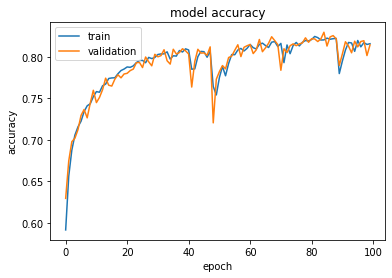

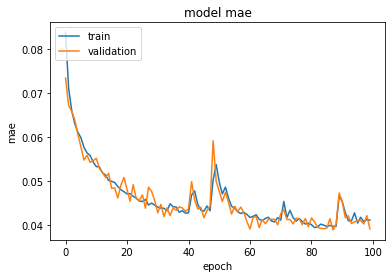

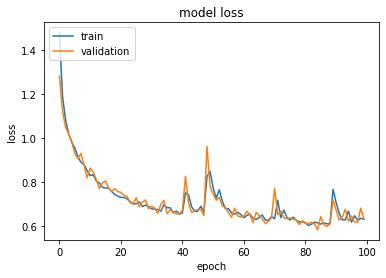

63/63 [==============================] - 0s 5ms/step - loss: 0.6275 - mae: 0.0388 - accuracy: 0.8163

Evaluation:
Loss, MAE, Accuracy [0.6274853944778442, 0.0388006754219532, 0.8162931203842163]
[[111138    407    391    345    224    241    420    259    165    446
     423    345    265]
 [  2009   3289    263     68    122    137    280     51     55    218
     262     53    160]
 [   861     14   5823     50      7     18     88     18     28    113
      12     69     18]
 [  1660     11    142   4047     97     23     24     13     29    121
     190    510     26]
 [   809    116    132     26   4486    111    108     18     68    140
     152    227    614]
 [  1092    142    108     68    157   4914     23     13    132    233
      57     16    158]
 [  1782     84    149     90     57     43   3463     26     69    145
     256    160     99]
 [  1098     56     81     56     42     32     60   5365     20     38
      83    111    101]
 [  1780    120    427    113    173 

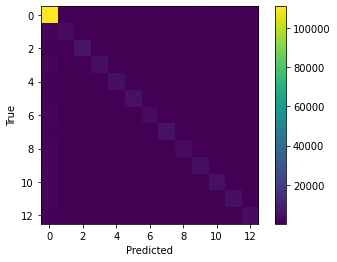

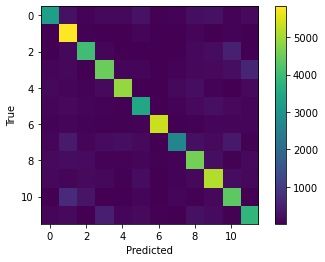

PSDS (0.2949918936996322, 'Valid file')



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv
Filling post processing used.
[[111797    265    365    253    209    210    354    255    127    339
     365    289    241]
 [  2659   3279    210     26     76     63    158      8     27    195
     170     34     62]
 [  1018      1   5929     17      0      2     44      0      9     60
       4     35      0]
 [  2107      0     77   4096     95     17     10      0     11     55
     116    309      0]
 [  1106     55    110     10   4879     42     51      0     18     93
      83    177    383]
 [  1360     27     75     44     83   5127      0      0     91    185
       9      0    112]
 [  2281      9     45     38      0      7   3687      0     20     44
     151     83     58]
 [  1290     17     51     10     26     18      4   5552     19      8
      41     73     34]
 [  2459     36    374     53    131    107     46      0   2731    162
      63    362     36]
 [  2480     71    113    106      0      0     28    

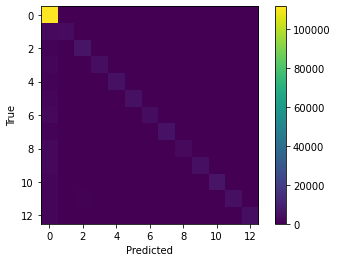

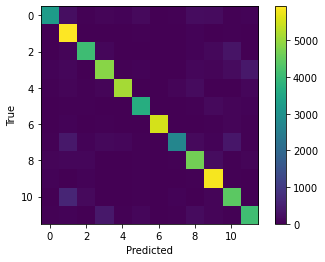

PSDS (nan, "Each file needs to have at least one label. 43 file(s) missing, e.g. ['09706_mix.wav', '01665_mix.wav', '06230_mix.wav']")


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv.pp.csv


In [23]:
pipe_param = {'data_folder': '/content/drive/MyDrive/Colab Notebooks/data/',
              'wav_files_folder': 'final_pre_dataset',
              'frame_size': 0.2, 'frame_stride': 0.098,
              'mel_filter': 32, 'nfft': 512,
              'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren moechte
              'eval_csv': 'challenge_filelist_dummy.csv',
              'scaling': 'standard', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
              'test_split_range': (8000, -1), # index anfang und ende aus dev set 
              'prediction_path': './', # wo prediction csvs gespeichert werden sollen
              'post_processing': 'fill', # 'fill' is das von Jannes.
              'post_timethres': 0.8, # post processing parameter
              'post_noisethres': 0.3,
              'post_base': 2,
              'submission_file_path': './challenge_submission.csv'}

model_param = {'layers': [64],
               'cell_type': 'gru',
               'dilation_rates': (1, 2),
               'conv_filter': 32,
               'conv_kernel_size': 2,
               'val_split_range': (6400, -1), # 0.2
               'loss': 'categorical_crossentropy', # bbdc.dice_loss moeglich
               'learning_rate': 0.01,
               'batch_size': 256,
               'epochs': 100,
               'model_save_path': './',
               'load_path': None} # Wenn trainiert werden soll: None; Submission 1: 'model9561.h5'

pipeline_rnn_1(pipe_param, model_param)

Mel filter version loading block.
Csv from wav files already existend. Skipping calc_fft_mel.
Scaled numpy files already existend. Skipping scaling and load_data function.
Splitting test set at indices 8000 to -1 from dev set.
Existing model.h5 removed.
Tensorflow version: 2.4.1
Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 100, 32)]         0         
_________________________________________________________________
conv1d_64 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_65 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_66 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_67 (Conv1D)           (None, 100, 3

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


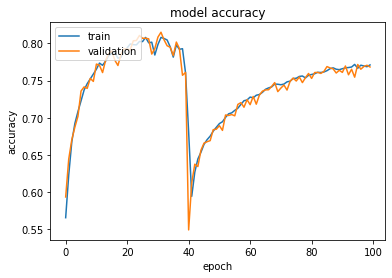

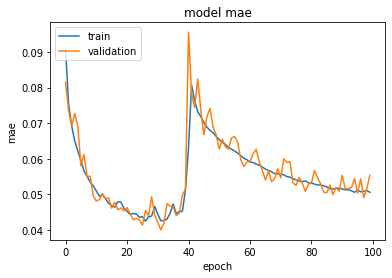

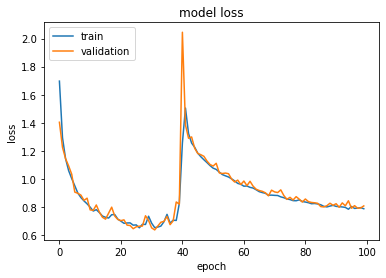

63/63 [==============================] - 0s 5ms/step - loss: 0.8125 - mae: 0.0555 - accuracy: 0.7679

Evaluation:
Loss, MAE, Accuracy [0.8125382661819458, 0.05550355091691017, 0.7679389715194702]
[[106177    539    553   1258    862    850    484   1069    551    868
     652    403    834]
 [  2182   2704    119    131    248    288    142    222    139    275
     233     19    211]
 [  1021     33   5022    208     48     81     51     64    119    125
      38     82     90]
 [  1592     20     18   4855     59     43     39    112     41    151
      73    109     30]
 [   915     55     34    179   4985    254     65    198     45    225
      66     55    898]
 [   985     87     52     99    498   5042     18     92    187    153
      27     12    117]
 [  1935    153     86    221    213     65   2265    225    256    267
     285    165    213]
 [   872     48     36    111     46     79     30   5885     33     44
      28     32     62]
 [  1641    100    190    346    506

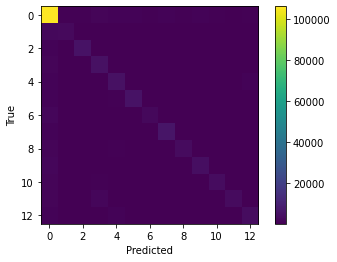

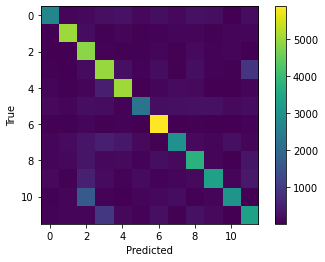

PSDS (0.16932741505092008, 'Valid file')



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv
Filling post processing used.
[[107431    376    503   1044    820    740    422    965    498    694
     504    356    747]
 [  2716   2926     44     96    190    159    128     98     75    231
     123      9    118]
 [  1241     19   5292    125      3     42     22     34     59     53
      14     40     38]
 [  1796      0      8   5008     60     24     18     35     21    108
      37     27      0]
 [  1104     27     11    131   5538    145      8    150     36    129
      44     77    574]
 [  1068     34     18     62    529   5306      0     71    112    105
       3     18     43]
 [  2424     87     44    146     75      0   2583    197    150    202
     211     68    162]
 [   925     19      8     80     23     72     12   6121      9      2
       0     20     15]
 [  2014     35    100    240    493    265     76     34   3268    135
      54    230     76]
 [  2313     66     77    247    124     40     45    

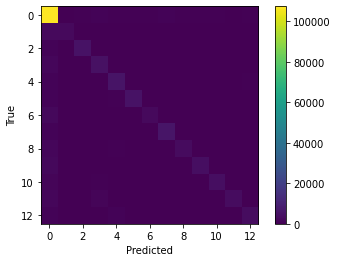

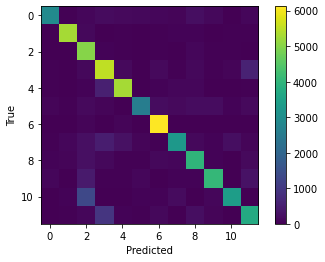

PSDS (nan, "Each file needs to have at least one label. 5 file(s) missing, e.g. ['01665_mix.wav', '00731_mix.wav', '06275_mix.wav']")


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv.pp.csv


In [24]:
pipe_param = {'data_folder': '/content/drive/MyDrive/Colab Notebooks/data/',
              'wav_files_folder': 'final_pre_dataset',
              'frame_size': 0.2, 'frame_stride': 0.098,
              'mel_filter': 32, 'nfft': 512,
              'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren moechte
              'eval_csv': 'challenge_filelist_dummy.csv',
              'scaling': 'standard', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
              'test_split_range': (8000, -1), # index anfang und ende aus dev set 
              'prediction_path': './', # wo prediction csvs gespeichert werden sollen
              'post_processing': 'fill', # 'fill' is das von Jannes.
              'post_timethres': 0.8, # post processing parameter
              'post_noisethres': 0.3,
              'post_base': 2,
              'submission_file_path': './challenge_submission.csv'}

model_param = {'layers': [200],
               'cell_type': 'gru',
               'dilation_rates': (1, 2),
               'conv_filter': 32,
               'conv_kernel_size': 2,
               'val_split_range': (6400, -1), # 0.2
               'loss': 'categorical_crossentropy', # bbdc.dice_loss moeglich
               'learning_rate': 0.01,
               'batch_size': 256,
               'epochs': 100,
               'model_save_path': './',
               'load_path': None} # Wenn trainiert werden soll: None; Submission 1: 'model9561.h5'

pipeline_rnn_1(pipe_param, model_param)

# first conv block tuning

Mel filter version loading block.
Csv from wav files already existend. Skipping calc_fft_mel.
Scaled numpy files already existend. Skipping scaling and load_data function.
Splitting test set at indices 8000 to -1 from dev set.
Existing model.h5 removed.
Tensorflow version: 2.4.1
Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 100, 32)]         0         
_________________________________________________________________
conv1d_80 (Conv1D)           (None, 100, 32)           3104      
_________________________________________________________________
conv1d_81 (Conv1D)           (None, 100, 32)           3104      
_________________________________________________________________
conv1d_82 (Conv1D)           (None, 100, 32)           3104      
_________________________________________________________________
conv1d_83 (Conv1D)           (None, 100, 3

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


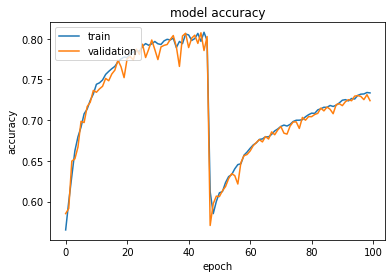

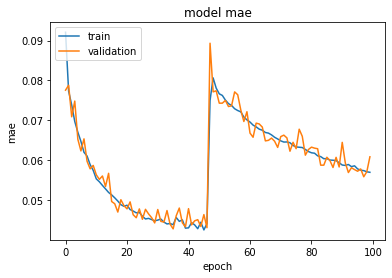

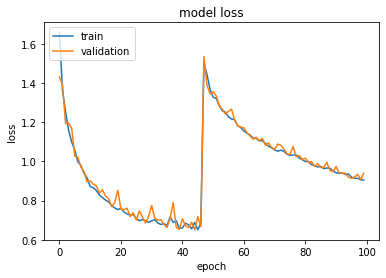

63/63 [==============================] - 0s 6ms/step - loss: 0.9446 - mae: 0.0612 - accuracy: 0.7219

Evaluation:
Loss, MAE, Accuracy [0.9446336030960083, 0.06122220680117607, 0.7219409942626953]
[[105982    942    336    602    901    603   1088    988    622    946
     483    822    303]
 [  2165   2485     39     33    466    305    484    152    441    485
     103    104    263]
 [  1051     22   3559    171     89    179    208     22    700    496
      18    398    120]
 [  1845     21      3   2910    197     17    125    213    115    463
     185   1077     40]
 [   772    100     15     45   4287    337    176    154     62    249
      59     92    433]
 [  1175     94     14     22    611   4349     32     78    428    237
      24     64     70]
 [  1914    358     74     61    244    153   2652     56    418    378
     170    298    181]
 [   875     30      5     80     91     72     45   5220    122     59
      26    159     73]
 [  1630    277     45    320    487

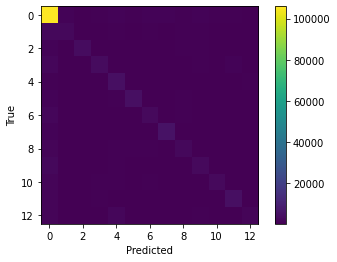

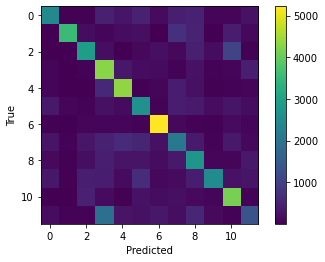

PSDS (0.09864596584835977, 'Valid file')



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv
Filling post processing used.
[[107218    719    324    501    855    537    940    883    549    637
     400    783    272]
 [  2768   2559     12     19    446    131    417     90    418    361
      38     78    188]
 [  1207     10   3780    152     76    104    138     15    626    406
      13    403    103]
 [  2406     10      0   2957    171      7     84    200     39    360
     160    799     18]
 [   912     37      0     19   4812    152    127    112     36    137
      14     75    348]
 [  1459     31      0     20    474   4482      0     44    413    196
       9     62      8]
 [  2422    325      0     54    142     50   3062     43    169    270
     111    143    166]
 [   932      1      3     29     27     25     49   5510    123     25
       0     91     42]
 [  2172    225      2    223    477    517    408    246   2292    171
      43    337     52]
 [  2719     73      0    151    350    109    231    

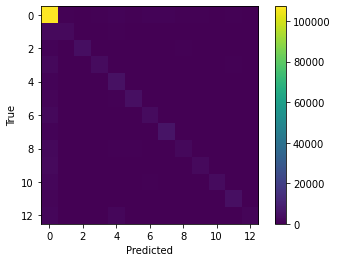

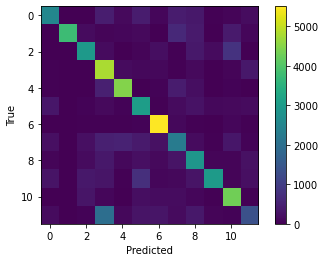

PSDS (nan, "Each file needs to have at least one label. 12 file(s) missing, e.g. ['05802_mix.wav', '02083_mix.wav', '03742_mix.wav']")


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv.pp.csv


In [28]:
pipe_param = {'data_folder': '/content/drive/MyDrive/Colab Notebooks/data/',
              'wav_files_folder': 'final_pre_dataset',
              'frame_size': 0.2, 'frame_stride': 0.098,
              'mel_filter': 32, 'nfft': 512,
              'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren moechte
              'eval_csv': 'challenge_filelist_dummy.csv',
              'scaling': 'standard', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
              'test_split_range': (8000, -1), # index anfang und ende aus dev set 
              'prediction_path': './', # wo prediction csvs gespeichert werden sollen
              'post_processing': 'fill', # 'fill' is das von Jannes.
              'post_timethres': 0.8, # post processing parameter
              'post_noisethres': 0.3,
              'post_base': 2,
              'submission_file_path': './challenge_submission.csv'}

model_param = {'layers': [32, 100],
               'cell_type': 'gru',
               'dilation_rates': (1, 2),
               'conv_filter': 32,
               'conv_kernel_size': 3,
               'val_split_range': (6400, -1), # 0.2
               'loss': 'categorical_crossentropy', # bbdc.dice_loss moeglich
               'learning_rate': 0.01,
               'batch_size': 256,
               'epochs': 100,
               'model_save_path': './',
               'load_path': None} # Wenn trainiert werden soll: None; Submission 1: 'model9561.h5'

pipeline_rnn_1(pipe_param, model_param)

Mel filter version loading block.
Csv from wav files already existend. Skipping calc_fft_mel.
Scaled numpy files already existend. Skipping scaling and load_data function.
Splitting test set at indices 8000 to -1 from dev set.
Existing model.h5 removed.
Tensorflow version: 2.4.1
Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(None, 100, 32)]         0         
_________________________________________________________________
conv1d_84 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_85 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_86 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_87 (Conv1D)           (None, 100, 3

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


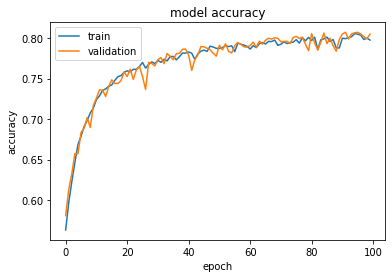

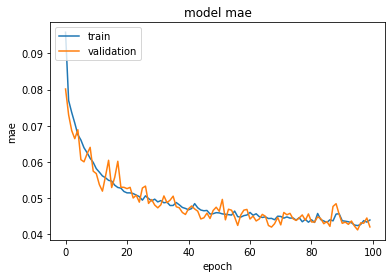

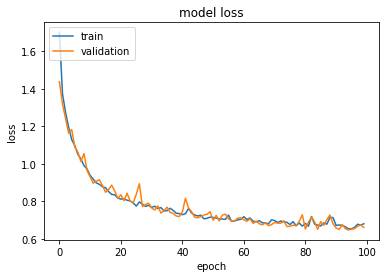

63/63 [==============================] - 0s 7ms/step - loss: 0.6588 - mae: 0.0419 - accuracy: 0.8067

Evaluation:
Loss, MAE, Accuracy [0.6588496565818787, 0.04185992851853371, 0.8066583275794983]
[[110929    615    294    446    422    247    405    321    333    390
     627    394    434]
 [  1767   3959     62     51    287    121    131     95    166    162
     106     67    192]
 [   986     82   5060    113     72     45    124      9    198    148
      40    197    125]
 [  1350     40     62   4058    113     18     54     16     47     58
     177    573     33]
 [   728    227     47     38   5114    107    113     52     94    112
      72     60    392]
 [  1021    218     75     41    452   4464     48     43    209    176
      34     38    177]
 [  1634    320    102    113    166     83   3148     30    234    110
     360    280    227]
 [   875     87     40    121     57     24     39   5219     20     49
      36    191     94]
 [  1292    238    173    151    465

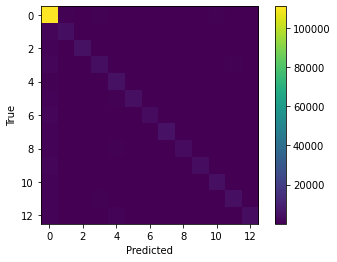

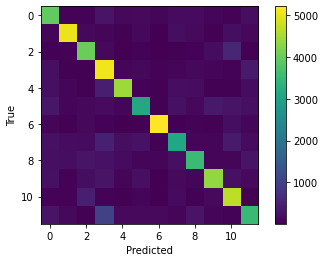

PSDS (0.2319464422881265, 'Valid file')



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv
Filling post processing used.
[[111516    496    284    367    413    245    363    311    270    291
     536    387    378]
 [  2177   4075     18     26    226     38     40     45    146    146
      47     64    118]
 [  1206     55   5497     54      9      0      9      0     89     86
       7     99     88]
 [  1694     23     23   4395     98      8     16      0      8      9
      64    246     15]
 [   927    116     11      9   5477     26     37     41     84     36
      55     27    310]
 [  1333    114     12     25    203   4911     14     15    129    117
       5     21     97]
 [  1915    244      0     77     54     38   3632     19    154     43
     283    143    205]
 [  1052     37      0     63     26      8     16   5444     12     21
       6    130     37]
 [  1723    158     34     79    452    147    120     32   3373     17
      54    343    124]
 [  2427    124    104    154    201     37     18    

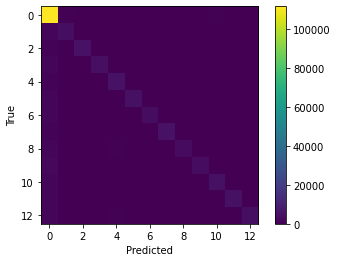

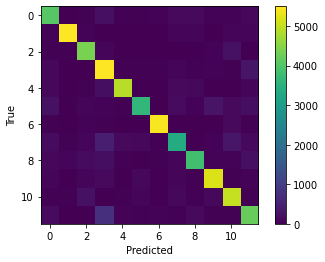

PSDS (nan, "Each file needs to have at least one label. 17 file(s) missing, e.g. ['07114_mix.wav', '06120_mix.wav', '04428_mix.wav']")


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv.pp.csv


In [29]:
pipe_param = {'data_folder': '/content/drive/MyDrive/Colab Notebooks/data/',
              'wav_files_folder': 'final_pre_dataset',
              'frame_size': 0.2, 'frame_stride': 0.098,
              'mel_filter': 32, 'nfft': 512,
              'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren moechte
              'eval_csv': 'challenge_filelist_dummy.csv',
              'scaling': 'standard', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
              'test_split_range': (8000, -1), # index anfang und ende aus dev set 
              'prediction_path': './', # wo prediction csvs gespeichert werden sollen
              'post_processing': 'fill', # 'fill' is das von Jannes.
              'post_timethres': 0.8, # post processing parameter
              'post_noisethres': 0.3,
              'post_base': 2,
              'submission_file_path': './challenge_submission.csv'}

model_param = {'layers': [32, 100],
               'cell_type': 'gru',
               'dilation_rates': (1, 2, 4, 8),
               'conv_filter': 32,
               'conv_kernel_size': 2,
               'val_split_range': (6400, -1), # 0.2
               'loss': 'categorical_crossentropy', # bbdc.dice_loss moeglich
               'learning_rate': 0.01,
               'batch_size': 256,
               'epochs': 100,
               'model_save_path': './',
               'load_path': None} # Wenn trainiert werden soll: None; Submission 1: 'model9561.h5'

pipeline_rnn_1(pipe_param, model_param)

Mel filter version loading block.
Csv from wav files already existend. Skipping calc_fft_mel.
Scaled numpy files already existend. Skipping scaling and load_data function.
Splitting test set at indices 8000 to -1 from dev set.
Existing model.h5 removed.
Tensorflow version: 2.4.1
Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 100, 32)]         0         
_________________________________________________________________
conv1d_92 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_93 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_94 (Conv1D)           (None, 100, 32)           2080      
_________________________________________________________________
conv1d_95 (Conv1D)           (None, 100, 3

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


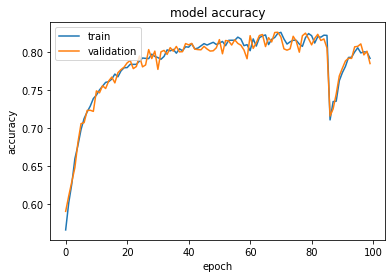

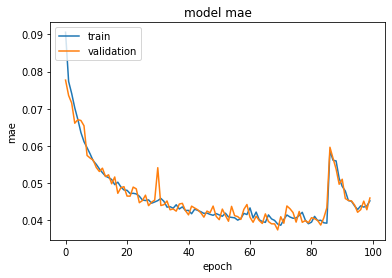

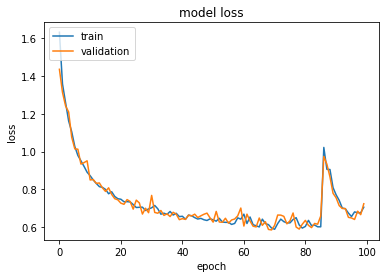

63/63 [==============================] - 0s 6ms/step - loss: 0.7246 - mae: 0.0458 - accuracy: 0.7858

Evaluation:
Loss, MAE, Accuracy [0.7246219515800476, 0.04583299905061722, 0.7857778668403625]
[[110809    397    290    410    114    218    695    325    222    470
     246    498    276]
 [  2231   2986    387     37     40    136    619     98    183    246
      60    163    141]
 [  1105     40   5360     77      1     31    143      7     67     99
      11    150     25]
 [  1701     69    183   3299     62     22    103     20    148    315
     134    818     22]
 [  1096    188    302     59   3175    191    283      8    223    216
      33    312   1169]
 [  1217    215    305     32    120   4519    179     20    304    187
      13     68    104]
 [  1649    105    277     45     21     45   3849     19    155    123
      50    314    116]
 [  1106     75     96     61     13     13    107   6003      7     52
      25    104    165]
 [  1556    130    585    226     38

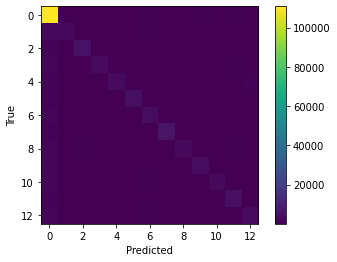

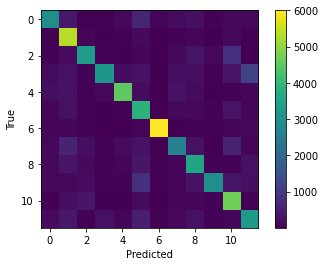

PSDS (0.1829287630988574, 'Valid file')



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv
Filling post processing used.
[[111521    284    295    263    107    195    616    332    173    291
     195    470    228]
 [  3009   2917    373      8     26     50    454     54     95    187
       6     83     65]
 [  1415     26   5484     32      0      0     45      0     30     49
       0     35      0]
 [  2373     44    158   3321     64      9     40      7     97    194
      95    484     10]
 [  1444    126    302     19   3505     71    143      0    137    106
       0    300   1102]
 [  1656    148    229     16     70   4764     41     16    160     96
      10     29     48]
 [  2076     47    166     14      0      0   4094      0    102     56
      26    140     47]
 [  1285     43     89     16      9      9     26   6241      0      4
       0     50     55]
 [  2189     77    528    117     19    115     92     25   2704    178
       0    506     73]
 [  2626     67    247     67      0     16    254    

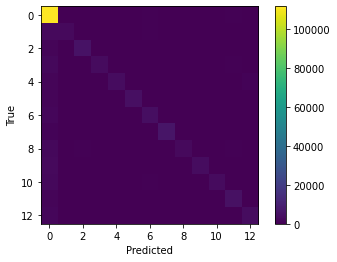

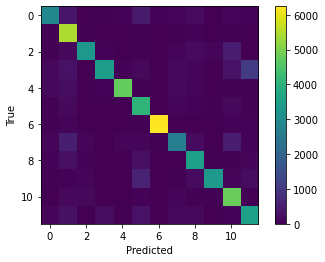

PSDS (nan, "Each file needs to have at least one label. 25 file(s) missing, e.g. ['09937_mix.wav', '08780_mix.wav', '09783_mix.wav']")


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv.pp.csv


In [30]:
pipe_param = {'data_folder': '/content/drive/MyDrive/Colab Notebooks/data/',
              'wav_files_folder': 'final_pre_dataset',
              'frame_size': 0.2, 'frame_stride': 0.098,
              'mel_filter': 32, 'nfft': 512,
              'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren moechte
              'eval_csv': 'challenge_filelist_dummy.csv',
              'scaling': 'standard', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
              'test_split_range': (8000, -1), # index anfang und ende aus dev set 
              'prediction_path': './', # wo prediction csvs gespeichert werden sollen
              'post_processing': 'fill', # 'fill' is das von Jannes.
              'post_timethres': 0.8, # post processing parameter
              'post_noisethres': 0.3,
              'post_base': 2,
              'submission_file_path': './challenge_submission.csv'}

model_param = {'layers': [32, 100],
               'cell_type': 'gru',
               'dilation_rates': (1, 2, 4),
               'conv_filter': 32,
               'conv_kernel_size': 2,
               'val_split_range': (6400, -1), # 0.2
               'loss': 'categorical_crossentropy', # bbdc.dice_loss moeglich
               'learning_rate': 0.01,
               'batch_size': 256,
               'epochs': 100,
               'model_save_path': './',
               'load_path': None} # Wenn trainiert werden soll: None; Submission 1: 'model9561.h5'

pipeline_rnn_1(pipe_param, model_param)

Mel filter version loading block.
Csv from wav files already existend. Skipping calc_fft_mel.
Scaled numpy files already existend. Skipping scaling and load_data function.
Splitting test set at indices 8000 to -1 from dev set.
Existing model.h5 removed.
Tensorflow version: 2.4.1
Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 100, 32)]         0         
_________________________________________________________________
conv1d_98 (Conv1D)           (None, 100, 64)           4160      
_________________________________________________________________
conv1d_99 (Conv1D)           (None, 100, 64)           8256      
_________________________________________________________________
conv1d_100 (Conv1D)          (None, 100, 64)           8256      
_________________________________________________________________
conv1d_101 (Conv1D)          (None, 100, 6

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


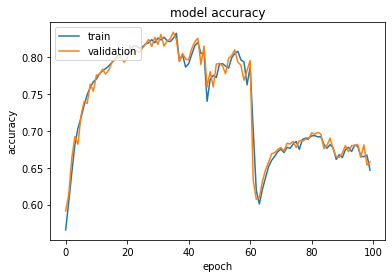

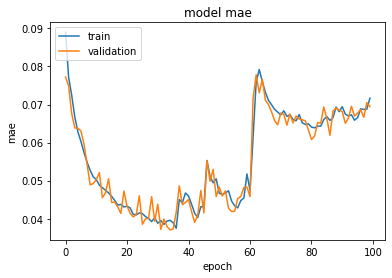

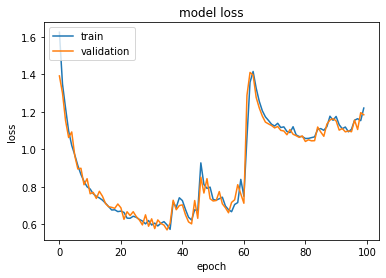

63/63 [==============================] - 0s 6ms/step - loss: 1.1820 - mae: 0.0693 - accuracy: 0.6578

Evaluation:
Loss, MAE, Accuracy [1.1820354461669922, 0.06934279203414917, 0.6577538847923279]
[[108967   1157    739    759    466    659    853    569    270    346
     235     82    147]
 [  2675   1853    490    127    110    285    678     99    214    131
     128     74    149]
 [  1384     49   3830    379     52     74    302     40    259     61
      31    115     25]
 [  3037     39    242   2445     74     15    282      3    147    127
     213    185     44]
 [  1468    152    346    333   2181    904    166    142    188    271
      65     55    576]
 [  1641    189    507     78    500   2937    200    101    514    271
       7     58    234]
 [  2446    266    332    366     88    172   2170      5    205    103
     281    124    140]
 [  1980    366    192    621     43    181    287   3370    225     99
      67     89    226]
 [  2372    270    792    424    269

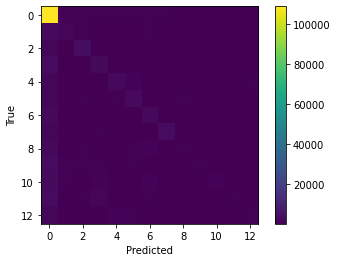

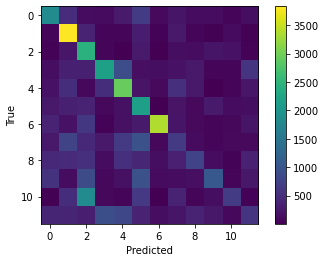

PSDS (0.029470359033807333, 'Valid file')



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv
Filling post processing used.
[[111241    671    653    325    318    491    537    374    179    151
     158     38    113]
 [  3328   1756    500     74    115    214    563     61    115     65
     102     54     66]
 [  1686     32   3964    274     42     67    152     35    206     34
      18     83      8]
 [  4157     13    223   1829     83      0    150      0     75     64
     110    123     26]
 [  1802     78    272    249   2826    796     39    119    129     74
      45     27    391]
 [  2020    128    520     44    581   3207     67    117    285    138
      10     44     76]
 [  3321    250    124    181     87     97   2181      0     71     38
     229      9    110]
 [  2461    105    143    459     60    189    202   3688    175     82
      34     40    108]
 [  3238    154    767    240    279    655    686     65    549     63
      49     56     45]
 [  4432    425    440    287     49    339    209    

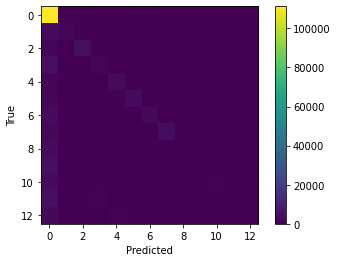

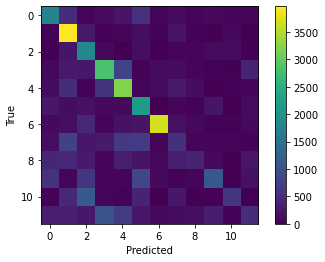

PSDS (nan, "Each file needs to have at least one label. 46 file(s) missing, e.g. ['09706_mix.wav', '09783_mix.wav', '06230_mix.wav']")


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv.pp.csv


In [31]:
pipe_param = {'data_folder': '/content/drive/MyDrive/Colab Notebooks/data/',
              'wav_files_folder': 'final_pre_dataset',
              'frame_size': 0.2, 'frame_stride': 0.098,
              'mel_filter': 32, 'nfft': 512,
              'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren moechte
              'eval_csv': 'challenge_filelist_dummy.csv',
              'scaling': 'standard', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
              'test_split_range': (8000, -1), # index anfang und ende aus dev set 
              'prediction_path': './', # wo prediction csvs gespeichert werden sollen
              'post_processing': 'fill', # 'fill' is das von Jannes.
              'post_timethres': 0.8, # post processing parameter
              'post_noisethres': 0.3,
              'post_base': 2,
              'submission_file_path': './challenge_submission.csv'}

model_param = {'layers': [32, 100],
               'cell_type': 'gru',
               'dilation_rates': (1, 2),
               'conv_filter': 64,
               'conv_kernel_size': 2,
               'val_split_range': (6400, -1), # 0.2
               'loss': 'categorical_crossentropy', # bbdc.dice_loss moeglich
               'learning_rate': 0.01,
               'batch_size': 256,
               'epochs': 100,
               'model_save_path': './',
               'load_path': None} # Wenn trainiert werden soll: None; Submission 1: 'model9561.h5'

pipeline_rnn_1(pipe_param, model_param)

# learning rate and batch size

Mel filter version loading block.
Csv from wav files already existend. Skipping calc_fft_mel.
Scaled numpy files already existend. Skipping scaling and load_data function.
Splitting test set at indices 8000 to -1 from dev set.
Existing model.h5 removed.
Tensorflow version: 2.4.1
Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 100, 32)]         0         
_________________________________________________________________
conv1d_102 (Conv1D)          (None, 100, 32)           2080      
_________________________________________________________________
conv1d_103 (Conv1D)          (None, 100, 32)           2080      
_________________________________________________________________
conv1d_104 (Conv1D)          (None, 100, 32)           2080      
_________________________________________________________________
conv1d_105 (Conv1D)          (None, 100, 3

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


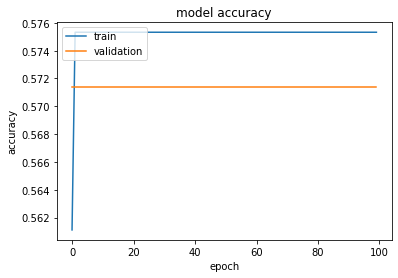

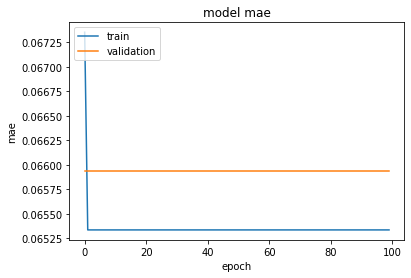

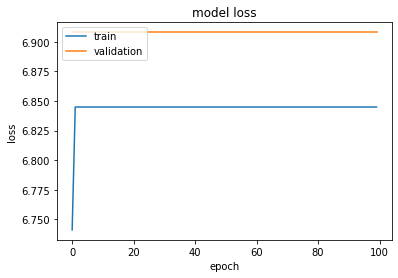

63/63 [==============================] - 0s 6ms/step - loss: 6.8477 - mae: 0.0654 - accuracy: 0.5752

Evaluation:
Loss, MAE, Accuracy [6.847731590270996, 0.0653611347079277, 0.575152575969696]
[[114973      0      0      0      0      0      0      0      0      0
       0      0      0]
 [  7638      0      0      0      0      0      0      0      0      0
       0      0      0]
 [  6702      0      0      0      0      0      0      0      0      0
       0      0      0]
 [  7176      0      0      0      0      0      0      0      0      0
       0      0      0]
 [  7473      0      0      0      0      0      0      0      0      0
       0      0      0]
 [  7213      0      0      0      0      0      0      0      0      0
       0      0      0]
 [  6803      0      0      0      0      0      0      0      0      0
       0      0      0]
 [  7371      0      0      0      0      0      0      0      0      0
       0      0      0]
 [  6767      0      0      0      0   

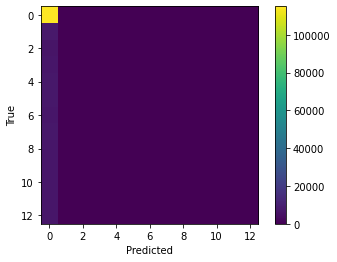

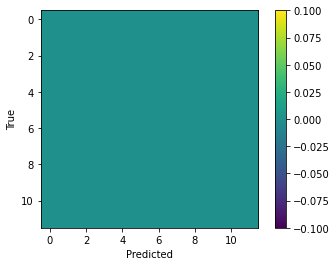

PSDS (nan, "Each file needs to have at least one label. 1999 file(s) missing, e.g. ['00571_mix.wav', '03925_mix.wav', '03426_mix.wav']")

Submission file saved at ./challenge_submission.csv
Filling post processing used.
[[114973      0      0      0      0      0      0      0      0      0
       0      0      0]
 [  7638      0      0      0      0      0      0      0      0      0
       0      0      0]
 [  6702      0      0      0      0      0      0      0      0      0
       0      0      0]
 [  7176      0      0      0      0      0      0      0      0      0
       0      0      0]
 [  7473      0      0      0      0      0      0      0      0      0
       0      0      0]
 [  7213      0      0      0      0      0      0      0      0      0
       0      0      0]
 [  6803      0      0      0      0      0      0      0      0      0
       0      0      0]
 [  7371      0      0      0      0      0      0      0      0      0
       0      0      0]
 [  6767    

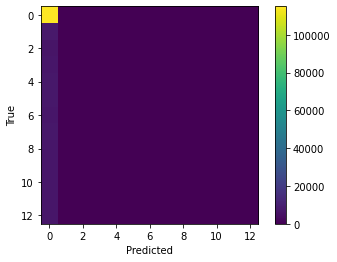

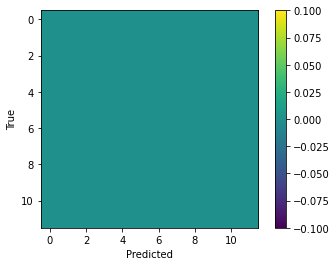

PSDS (nan, "Each file needs to have at least one label. 1999 file(s) missing, e.g. ['00571_mix.wav', '03925_mix.wav', '03426_mix.wav']")
Submission file saved at ./challenge_submission.csv.pp.csv


In [32]:
pipe_param = {'data_folder': '/content/drive/MyDrive/Colab Notebooks/data/',
              'wav_files_folder': 'final_pre_dataset',
              'frame_size': 0.2, 'frame_stride': 0.098,
              'mel_filter': 32, 'nfft': 512,
              'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren moechte
              'eval_csv': 'challenge_filelist_dummy.csv',
              'scaling': 'standard', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
              'test_split_range': (8000, -1), # index anfang und ende aus dev set 
              'prediction_path': './', # wo prediction csvs gespeichert werden sollen
              'post_processing': 'fill', # 'fill' is das von Jannes.
              'post_timethres': 0.8, # post processing parameter
              'post_noisethres': 0.3,
              'post_base': 2,
              'submission_file_path': './challenge_submission.csv'}

model_param = {'layers': [32, 100],
               'cell_type': 'gru',
               'dilation_rates': (1, 2),
               'conv_filter': 32,
               'conv_kernel_size': 2,
               'val_split_range': (6400, -1), # 0.2
               'loss': 'categorical_crossentropy', # bbdc.dice_loss moeglich
               'learning_rate': 1,
               'batch_size': 256,
               'epochs': 100,
               'model_save_path': './',
               'load_path': None} # Wenn trainiert werden soll: None; Submission 1: 'model9561.h5'

pipeline_rnn_1(pipe_param, model_param)

Mel filter version loading block.
Csv from wav files already existend. Skipping calc_fft_mel.
Scaled numpy files already existend. Skipping scaling and load_data function.
Splitting test set at indices 8000 to -1 from dev set.
Existing model.h5 removed.
Tensorflow version: 2.4.1
Model: "model_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 100, 32)]         0         
_________________________________________________________________
conv1d_106 (Conv1D)          (None, 100, 32)           2080      
_________________________________________________________________
conv1d_107 (Conv1D)          (None, 100, 32)           2080      
_________________________________________________________________
conv1d_108 (Conv1D)          (None, 100, 32)           2080      
_________________________________________________________________
conv1d_109 (Conv1D)          (None, 100, 3

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


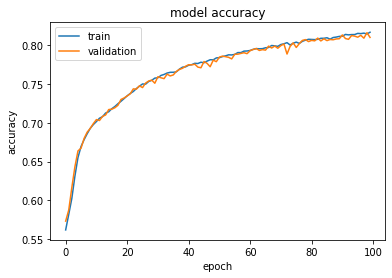

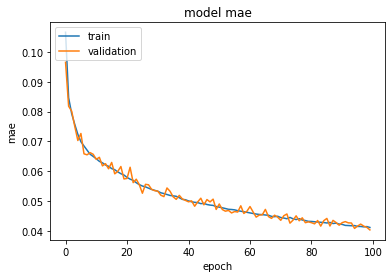

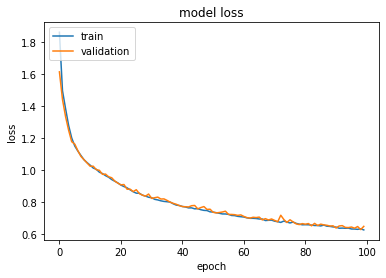

63/63 [==============================] - 0s 6ms/step - loss: 0.6469 - mae: 0.0404 - accuracy: 0.8101

Evaluation:
Loss, MAE, Accuracy [0.6468702554702759, 0.040361057966947556, 0.810075044631958]
[[111271    526    234    557    219    310    271    242    301    366
     250    282    130]
 [  2033   4144     69     81    130    152    118     73    193    194
      57     61     76]
 [  1005     71   4999    147     21     53     99     31    272    216
      19    153     39]
 [  1704     84     23   4594     63     29     37     45     84    176
      73    375      9]
 [  1030    226     46    197   4558    429    150     46    113    183
      56    112    367]
 [  1037    164     29     76    102   4782      4     23    185    133
      24     23     31]
 [  2047    320    106    139    128     83   3078     44    279    196
     240    263    100]
 [  1122    131     51    118     27     60     42   5855     34     91
      26    114     33]
 [  1425    204    117    224    112

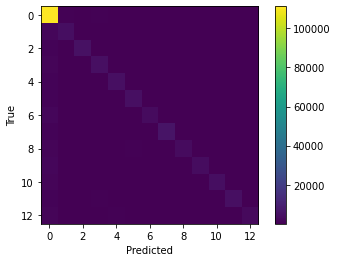

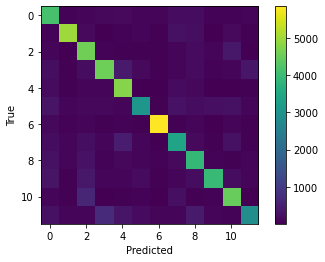

PSDS (0.2604838169935325, 'Valid file')



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv
Filling post processing used.
[[111890    393    227    445    213    246    225    229    230    263
     236    234    128]
 [  2652   4203     18     25     73     43     78     28    149     59
      26     27      0]
 [  1330     43   5246     59      6     41     31     11    143    108
      25     64     18]
 [  2242     33     10   4633     55      8     25      0     36     84
      34    136      0]
 [  1566    105     10     93   5138    219     46      0      9    109
      27     82    109]
 [  1397     18      0     30     63   4922      0      9    127     18
       0     19     10]
 [  2774    212     48     69     86      8   3190     19    138    120
     171    147     41]
 [  1376     51     26     60      0     32     18   6060      9     17
      21     34      0]
 [  1995     93     36    137     94    335     10      0   3645     41
       0    176     19]
 [  2497    154     19    208      9     82     70    

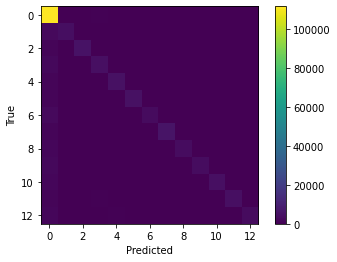

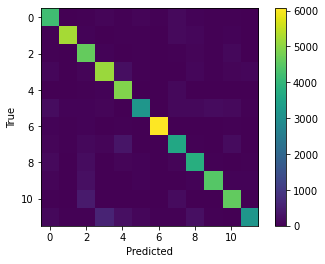

PSDS (nan, "Each file needs to have at least one label. 33 file(s) missing, e.g. ['09937_mix.wav', '04428_mix.wav', '02944_mix.wav']")


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv.pp.csv


In [33]:
pipe_param = {'data_folder': '/content/drive/MyDrive/Colab Notebooks/data/',
              'wav_files_folder': 'final_pre_dataset',
              'frame_size': 0.2, 'frame_stride': 0.098,
              'mel_filter': 32, 'nfft': 512,
              'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren moechte
              'eval_csv': 'challenge_filelist_dummy.csv',
              'scaling': 'standard', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
              'test_split_range': (8000, -1), # index anfang und ende aus dev set 
              'prediction_path': './', # wo prediction csvs gespeichert werden sollen
              'post_processing': 'fill', # 'fill' is das von Jannes.
              'post_timethres': 0.8, # post processing parameter
              'post_noisethres': 0.3,
              'post_base': 2,
              'submission_file_path': './challenge_submission.csv'}

model_param = {'layers': [32, 100],
               'cell_type': 'gru',
               'dilation_rates': (1, 2),
               'conv_filter': 32,
               'conv_kernel_size': 2,
               'val_split_range': (6400, -1), # 0.2
               'loss': 'categorical_crossentropy', # bbdc.dice_loss moeglich
               'learning_rate': 0.001,
               'batch_size': 256,
               'epochs': 100,
               'model_save_path': './',
               'load_path': None} # Wenn trainiert werden soll: None; Submission 1: 'model9561.h5'

pipeline_rnn_1(pipe_param, model_param)

In [34]:
pipe_param = {'data_folder': '/content/drive/MyDrive/Colab Notebooks/data/',
              'wav_files_folder': 'final_pre_dataset',
              'frame_size': 0.2, 'frame_stride': 0.098,
              'mel_filter': 32, 'nfft': 512,
              'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren moechte
              'eval_csv': 'challenge_filelist_dummy.csv',
              'scaling': 'standard', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
              'test_split_range': (8000, -1), # index anfang und ende aus dev set 
              'prediction_path': './', # wo prediction csvs gespeichert werden sollen
              'post_processing': 'fill', # 'fill' is das von Jannes.
              'post_timethres': 0.8, # post processing parameter
              'post_noisethres': 0.3,
              'post_base': 2,
              'submission_file_path': './challenge_submission.csv'}

model_param = {'layers': [32, 100],
               'cell_type': 'gru',
               'dilation_rates': (1, 2),
               'conv_filter': 32,
               'conv_kernel_size': 2,
               'val_split_range': (6400, -1), # 0.2
               'loss': 'categorical_crossentropy', # bbdc.dice_loss moeglich
               'learning_rate': 0.01,
               'batch_size': 32,
               'epochs': 100,
               'model_save_path': './',
               'load_path': None} # Wenn trainiert werden soll: None; Submission 1: 'model9561.h5'

pipeline_rnn_1(pipe_param, model_param)

Mel filter version loading block.
Csv from wav files already existend. Skipping calc_fft_mel.
Scaled numpy files already existend. Skipping scaling and load_data function.
Splitting test set at indices 8000 to -1 from dev set.
Existing model.h5 removed.
Tensorflow version: 2.4.1
Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 100, 32)]         0         
_________________________________________________________________
conv1d_110 (Conv1D)          (None, 100, 32)           2080      
_________________________________________________________________
conv1d_111 (Conv1D)          (None, 100, 32)           2080      
_________________________________________________________________
conv1d_112 (Conv1D)          (None, 100, 32)           2080      
_________________________________________________________________
conv1d_113 (Conv1D)          (None, 100, 3

KeyboardInterrupt: ignored

# more epochs

Mel filter version loading block.
Csv from wav files already existend. Skipping calc_fft_mel.
Scaled numpy files already existend. Skipping scaling and load_data function.
Splitting test set at indices 8000 to -1 from dev set.
Existing model.h5 removed.
Tensorflow version: 2.4.1
Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        [(None, 100, 32)]         0         
_________________________________________________________________
conv1d_114 (Conv1D)          (None, 100, 32)           2080      
_________________________________________________________________
conv1d_115 (Conv1D)          (None, 100, 32)           2080      
_________________________________________________________________
conv1d_116 (Conv1D)          (None, 100, 32)           2080      
_________________________________________________________________
conv1d_117 (Conv1D)          (None, 100, 3

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


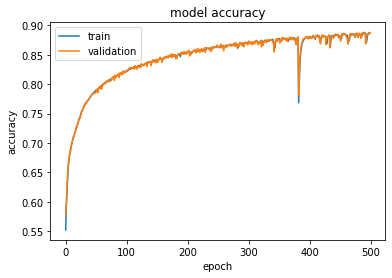

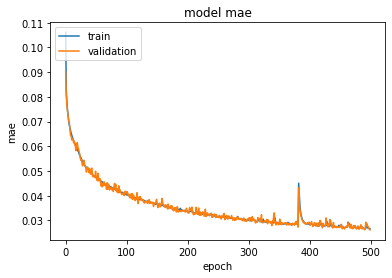

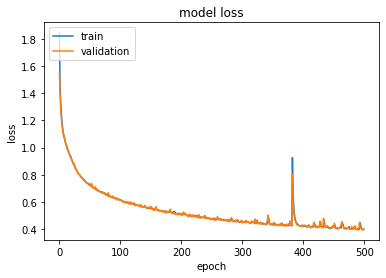

63/63 [==============================] - 0s 6ms/step - loss: 0.3993 - mae: 0.0262 - accuracy: 0.8862

Evaluation:
Loss, MAE, Accuracy [0.3992520272731781, 0.02618158422410488, 0.8862231373786926]
[[111197    348    161    269    152    264    253    230    283    285
     314    342    241]
 [  1266   5338     43     12     64    119     92     53    101    126
     102     36     57]
 [   701     24   5510     33      5     53     60     20     84     72
      20    101     47]
 [  1098     10     26   5264     17      6     20     25     50     56
      57    243     28]
 [   737     91     39     15   6307    172     28     33    111     40
      75     47    213]
 [   750    100     34     14     45   5884     28     32    121     79
      43     20     54]
 [  1218    109     86     49     37     66   4566     15    127    120
     137    147    104]
 [   710     60     11     46     18     36     27   5895     45     46
      35     55     50]
 [   980    109     61     46     38

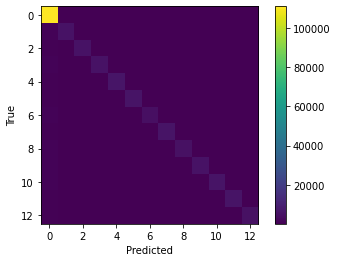

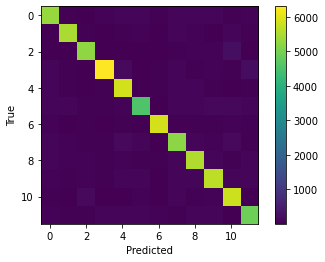

PSDS (0.5974267635742307, 'Valid file')



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv
Filling post processing used.
[[111548    277    160    217    150    222    234    208    255    243
     284    318    223]
 [  1749   5540      0      0     10      0     24      0      9     43
      16      9      9]
 [   853      9   5779      0      1     10      0      3     27     18
       0     23      7]
 [  1403      1      9   5437      3      0      1      1     10      0
       9     26      0]
 [   870     20      0      0   6865     16      0      0     63      0
      27     19     28]
 [   915      0      0      0     10   6226      0      0     37      9
       0      0      7]
 [  1739      8      0      0      0      0   4944      6     19     14
      28     23      0]
 [   885      9      0     16      8     11      9   6043     19     15
      15      0      4]
 [  1265     17      0      0     14      0      0      0   5654     18
       0     93      0]
 [  1294     34      0      6      0     10      9    

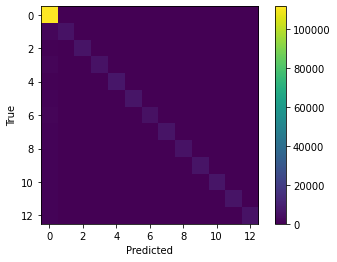

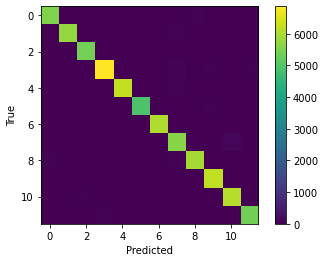

PSDS (nan, "Each file needs to have at least one label. 11 file(s) missing, e.g. ['00794_mix.wav', '05009_mix.wav', '08378_mix.wav']")


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv.pp.csv


In [35]:
pipe_param = {'data_folder': '/content/drive/MyDrive/Colab Notebooks/data/',
              'wav_files_folder': 'final_pre_dataset',
              'frame_size': 0.2, 'frame_stride': 0.098,
              'mel_filter': 32, 'nfft': 512,
              'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren moechte
              'eval_csv': 'challenge_filelist_dummy.csv',
              'scaling': 'standard', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
              'test_split_range': (8000, -1), # index anfang und ende aus dev set 
              'prediction_path': './', # wo prediction csvs gespeichert werden sollen
              'post_processing': 'fill', # 'fill' is das von Jannes.
              'post_timethres': 0.8, # post processing parameter
              'post_noisethres': 0.3,
              'post_base': 2,
              'submission_file_path': './challenge_submission.csv'}

model_param = {'layers': [32, 100],
               'cell_type': 'gru',
               'dilation_rates': (1, 2),
               'conv_filter': 32,
               'conv_kernel_size': 2,
               'val_split_range': (6400, -1), # 0.2
               'loss': 'categorical_crossentropy', # bbdc.dice_loss moeglich
               'learning_rate': 0.001,
               'batch_size': 256,
               'epochs': 500,
               'model_save_path': './',
               'load_path': None} # Wenn trainiert werden soll: None; Submission 1: 'model9561.h5'

pipeline_rnn_1(pipe_param, model_param)

Streaming output truncated to the last 5000 lines.
Epoch 751/2000
40/40 [==============================] - 1s 24ms/step - loss: 0.3835 - mae: 0.0256 - accuracy: 0.8898 - val_loss: 0.3702 - val_mae: 0.0254 - val_accuracy: 0.8938

Epoch 00751: val_loss did not improve from 0.36822
Epoch 752/2000
40/40 [==============================] - 1s 24ms/step - loss: 0.3735 - mae: 0.0253 - accuracy: 0.8927 - val_loss: 0.3728 - val_mae: 0.0251 - val_accuracy: 0.8929

Epoch 00752: val_loss did not improve from 0.36822
Epoch 753/2000
40/40 [==============================] - 1s 24ms/step - loss: 0.3723 - mae: 0.0251 - accuracy: 0.8936 - val_loss: 0.3684 - val_mae: 0.0250 - val_accuracy: 0.8947

Epoch 00753: val_loss did not improve from 0.36822
Epoch 754/2000
40/40 [==============================] - 1s 24ms/step - loss: 0.3714 - mae: 0.0251 - accuracy: 0.8939 - val_loss: 0.3786 - val_mae: 0.0261 - val_accuracy: 0.8907

Epoch 00754: val_loss did not improve from 0.36822
Epoch 755/2000
40/40 [===========

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


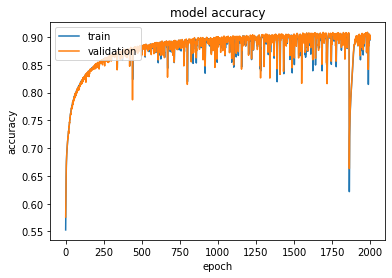

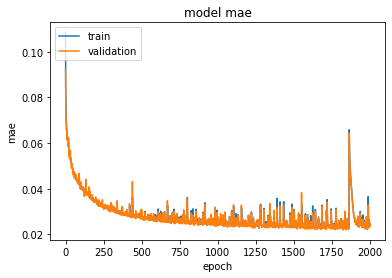

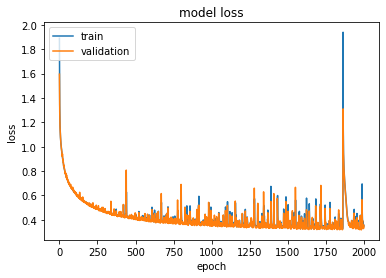

63/63 [==============================] - 0s 6ms/step - loss: 0.3316 - mae: 0.0235 - accuracy: 0.9030

Evaluation:
Loss, MAE, Accuracy [0.331648588180542, 0.023482216522097588, 0.9029614925384521]
[[112350    372    207    293    179    191    212    223    240    280
     232    203    239]
 [   945   5516     35     17     88     90     32     32     62     75
      72     12     54]
 [   564     13   5719     41      4      9     65     24     52     35
      11     36     31]
 [   888     14     31   5740     27     11     36     20     45     54
      30    186     23]
 [   682     87     13     13   6234     74     23     21     32     23
      78     28    114]
 [   739    109     29      6    103   6275     10     15     81     39
      36     21     61]
 [  1044     35     95     60     14     23   5123     35     89    114
     102    122     94]
 [   642     34     40     27     16     24     28   6250     25     17
      52     32     43]
 [   789     88    103     62     47

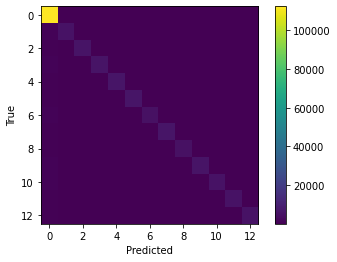

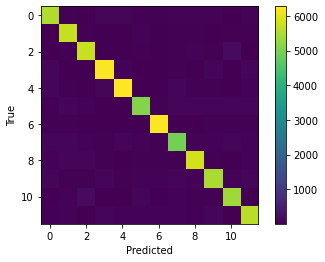

PSDS (0.6841080321834734, 'Valid file')



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv
Filling post processing used.
[[112621    294    173    239    180    186    217    221    216    217
     225    207    225]
 [  1336   5642      0      9      1      2      0      9      7      5
       0      0     19]
 [   701      0   5887      0      0      0      3      4      0      0
       0      8      1]
 [  1190      0      0   5850     11      9      7     10      0      1
       0     23      4]
 [   779     10      0      0   6556      0     17      0      2      0
       7     17     34]
 [  1003      9     19      0      8   6467      0      5     11      0
       0      0      2]
 [  1428      0      0      0      0      0   5463      0      9      8
      14     16     12]
 [   786      1      0      0      0      8      2   6428      0      2
       3      0      0]
 [  1085     24     18      0      0     33      0      0   5380      0
       0      0      0]
 [  1218     11     10     17      0      1      0    

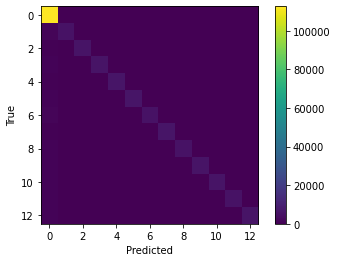

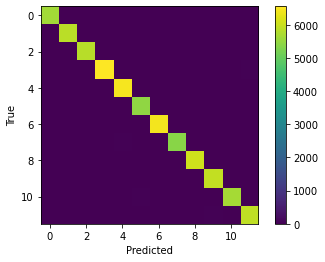

PSDS (nan, "Each file needs to have at least one label. 14 file(s) missing, e.g. ['06050_mix.wav', '05758_mix.wav', '02022_mix.wav']")


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv.pp.csv


In [43]:
# more batch and more epochs
pipe_param = {'data_folder': '/content/drive/MyDrive/Colab Notebooks/data/',
              'wav_files_folder': 'final_pre_dataset',
              'frame_size': 0.2, 'frame_stride': 0.098,
              'mel_filter': 32, 'nfft': 512,
              'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren moechte
              'eval_csv': 'challenge_filelist_dummy.csv',
              'scaling': 'standard', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
              'test_split_range': (8000, -1), # index anfang und ende aus dev set 
              'prediction_path': './', # wo prediction csvs gespeichert werden sollen
              'post_processing': 'fill', # 'fill' is das von Jannes.
              'post_timethres': 0.8, # post processing parameter
              'post_noisethres': 0.3,
              'post_base': 2,
              'submission_file_path': './challenge_submission.csv'}

model_param = {'layers': [32, 100],
               'cell_type': 'gru',
               'dilation_rates': (1, 2),
               'conv_filter': 32,
               'conv_kernel_size': 2,
               'val_split_range': (6400, -1), # 0.2
               'loss': 'categorical_crossentropy', # bbdc.dice_loss moeglich
               'learning_rate': 0.001,
               'batch_size': 256,
               'epochs': 2000,
               'model_save_path': './',
               'load_path': None} # Wenn trainiert werden soll: None; Submission 1: 'model9561.h5'

pipeline_rnn_1(pipe_param, model_param)

# without conv first layers

Mel filter version loading block.
Csv from wav files already existend. Skipping calc_fft_mel.
Scaled numpy files already existend. Skipping scaling and load_data function.
Splitting test set at indices 8000 to -1 from dev set.
Existing model.h5 removed.
Tensorflow version: 2.4.1
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 32)]         0         
_________________________________________________________________
gru (GRU)                    (None, 100, 32)           6336      
_________________________________________________________________
gru_1 (GRU)                  (None, 100, 100)          40200     
_________________________________________________________________
time_distributed (TimeDistri (None, 100, 13)           1313      
Total params: 47,849
Trainable params: 47,849
Non-trainable params: 0
_________________________________________

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


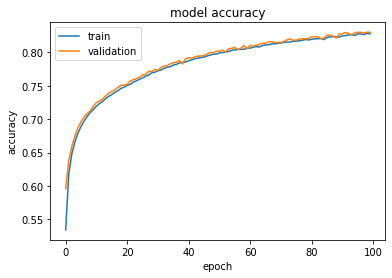

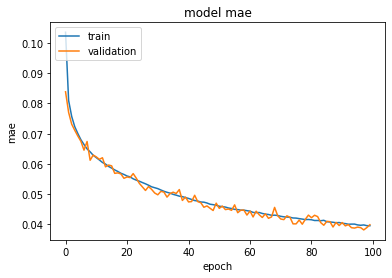

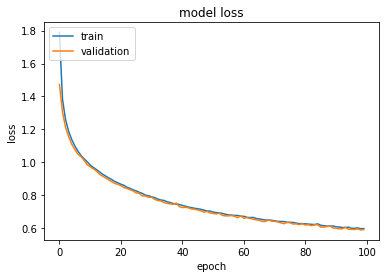

63/63 [==============================] - 0s 5ms/step - loss: 0.5947 - mae: 0.0401 - accuracy: 0.8277

Evaluation:
Loss, MAE, Accuracy [0.594720721244812, 0.040111832320690155, 0.827698826789856]
[[109873    501    379    411    268    299    591    301    465    506
     475    351    352]
 [  1910   4205    144     58    202    136    148     42    224    167
     146     47    180]
 [   906     25   5690     67     16     37     84     19    168     60
      36    110     68]
 [  1664     35     53   4223    197     24     40     48     84    115
     220    416     33]
 [   842     88     38     29   5020    127     77     30    203    103
      70     62    595]
 [   941     88     76     46    161   5180     27     14    191     89
      21      9    165]
 [  1696    172    105     47     79     57   3973     50    174    104
     239    106    187]
 [   930     66     31     58    113     48     47   5537     26     41
      50     82    123]
 [  1250     96    228    101    147 

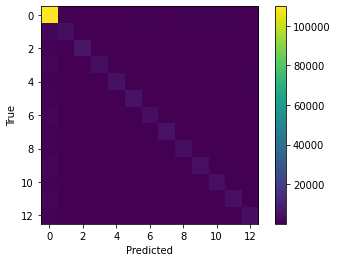

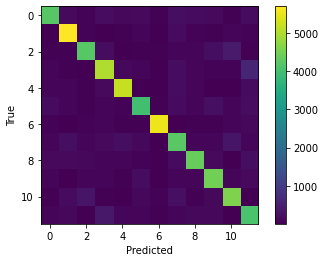

PSDS (0.33173538314417317, 'Valid file')



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv
Filling post processing used.
[[110645    396    374    313    282    284    462    286    384    365
     385    290    306]
 [  2398   4550     74     32     89     33     67      0    185     35
      63      8     75]
 [  1153      8   5955     18      0      7     13      9     46     17
      16     24     20]
 [  2169      8     29   4304    206      9     17     43     43     44
      86    194      0]
 [  1093     30     18      0   5462     12     17      0    129     25
      26     29    443]
 [  1268      0     43     27     70   5381      0      0     78     33
      16      8     84]
 [  2232     92     48     15     10      0   4310     17     67      9
      78      0    111]
 [  1149     28     21      0    100      9     15   5750     12      0
       0      7     61]
 [  1751     20    137     17    110     92     55     17   4450     27
      19    282    106]
 [  2224     66     55     63     22     19     28    

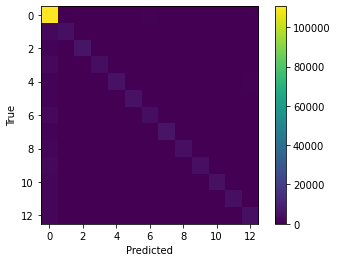

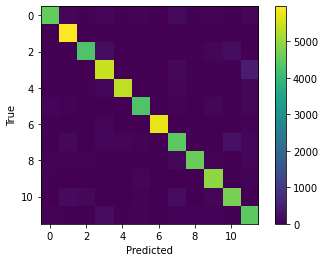

PSDS (nan, "Each file needs to have at least one label. 23 file(s) missing, e.g. ['02519_mix.wav', '00490_mix.wav', '06643_mix.wav']")


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv.pp.csv


In [9]:
# more batch and more epochs
pipe_param = {'data_folder': '/content/drive/MyDrive/Colab Notebooks/data/',
              'wav_files_folder': 'final_pre_dataset',
              'frame_size': 0.2, 'frame_stride': 0.098,
              'mel_filter': 32, 'nfft': 512,
              'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren moechte
              'eval_csv': 'challenge_filelist_dummy.csv',
              'scaling': 'standard', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
              'test_split_range': (8000, -1), # index anfang und ende aus dev set 
              'prediction_path': './', # wo prediction csvs gespeichert werden sollen
              'post_processing': 'fill', # 'fill' is das von Jannes.
              'post_timethres': 0.8, # post processing parameter
              'post_noisethres': 0.3,
              'post_base': 2,
              'submission_file_path': './challenge_submission.csv'}

model_param = {'layers': [32, 100],
               'cell_type': 'gru',
               'conv': False,
               'dilation_rates': None,
               'conv_filter': None,
               'conv_kernel_size': None,
               'val_split_range': (6400, -1), # 0.2
               'loss': 'categorical_crossentropy', # bbdc.dice_loss moeglich
               'learning_rate': 0.001,
               'batch_size': 256,
               'epochs': 100,
               'model_save_path': './',
               'load_path': None} # Wenn trainiert werden soll: None; Submission 1: 'model9561.h5'

pipeline_rnn_1(pipe_param, model_param)

Mel filter version loading block.
Csv from wav files already existend. Skipping calc_fft_mel.
Scaled numpy files already existend. Skipping scaling and load_data function.
Splitting test set at indices 8000 to -1 from dev set.
Existing model.h5 removed.
Tensorflow version: 2.4.1
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 32)]         0         
_________________________________________________________________
gru_2 (GRU)                  (None, 100, 20)           3240      
_________________________________________________________________
gru_3 (GRU)                  (None, 100, 20)           2520      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 100, 13)           273       
Total params: 6,033
Trainable params: 6,033
Non-trainable params: 0
_________________________________________

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


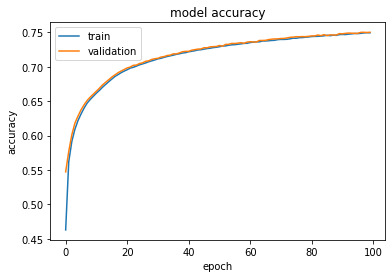

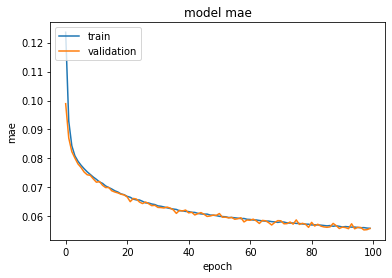

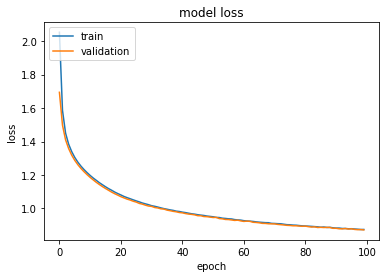

63/63 [==============================] - 0s 5ms/step - loss: 0.8668 - mae: 0.0557 - accuracy: 0.7510

Evaluation:
Loss, MAE, Accuracy [0.8668386936187744, 0.05569986626505852, 0.7510055303573608]
[[107334    693    464    828    814    788    453    639    404    611
     730    473    406]
 [  2355   2625     68     52    259    247    153    108    215    181
     164     25    172]
 [  1304     25   4591    221     44     74     95     70    236    128
      29    134    121]
 [  2040     34     20   3664    115    100     23     84     58    148
     246    504     68]
 [  1199    177     50     94   4339    349     79    126     91    147
     128     65    659]
 [  1537    134     58     76    382   5183     57     81    252    104
      36     30    139]
 [  2474    242    112    131    131    123   2690     62    248    180
     283    228    142]
 [  1335     71     61    209     53    117     75   5304     35    123
      39    109     83]
 [  1756    165    139    315    245

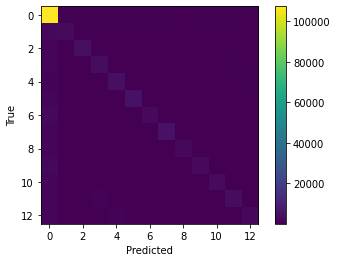

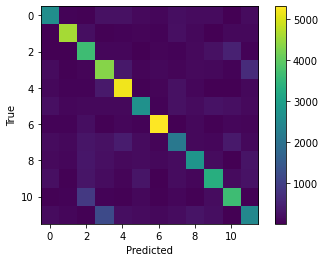

PSDS (0.14648155428030005, 'Valid file')



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv
Filling post processing used.
[[108683    533    413    641    720    678    357    551    352    389
     571    460    289]
 [  2997   2512     14     27    186    122    157     51    162    143
     117     23    113]
 [  1511     10   4803    187     59     39     35     36    226      0
       9    115     42]
 [  2532     12      0   3681    121     70      0     45     28     69
     165    360     21]
 [  1510     68     36     71   4868    228     16     76     67    105
      49     43    366]
 [  1851     37     47     54    349   5386      0     45    204     23
      10     14     49]
 [  3223    198     44     97    104     42   2724      4    159    101
     180     83     87]
 [  1473     35     46    110     36     72     56   5584     20     65
      11     70     36]
 [  2454     84     78    221    239    356     93     45   2123     67
      25    333     64]
 [  3327    117     82    229    130     63     93    

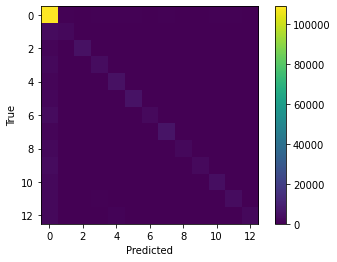

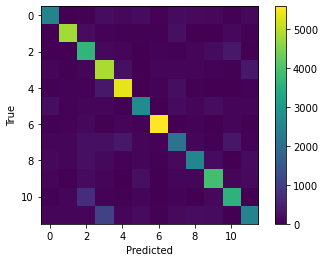

PSDS (nan, "Each file needs to have at least one label. 29 file(s) missing, e.g. ['00632_mix.wav', '06276_mix.wav', '05299_mix.wav']")


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Submission file saved at ./challenge_submission.csv.pp.csv


In [10]:
# more batch and more epochs
pipe_param = {'data_folder': '/content/drive/MyDrive/Colab Notebooks/data/',
              'wav_files_folder': 'final_pre_dataset',
              'frame_size': 0.2, 'frame_stride': 0.098,
              'mel_filter': 32, 'nfft': 512,
              'dev_csv': 'dev-labels.csv', # filelisten, falls man doch auf kleinerem probieren moechte
              'eval_csv': 'challenge_filelist_dummy.csv',
              'scaling': 'standard', # 'standard', 'minmax' oder 'no' wenn kein scaling sein soll
              'test_split_range': (8000, -1), # index anfang und ende aus dev set 
              'prediction_path': './', # wo prediction csvs gespeichert werden sollen
              'post_processing': 'fill', # 'fill' is das von Jannes.
              'post_timethres': 0.8, # post processing parameter
              'post_noisethres': 0.3,
              'post_base': 2,
              'submission_file_path': './challenge_submission.csv'}

model_param = {'layers': [20, 20],
               'cell_type': 'gru',
               'conv': False,
               'dilation_rates': None,
               'conv_filter': None,
               'conv_kernel_size': None,
               'val_split_range': (6400, -1), # 0.2
               'loss': 'categorical_crossentropy', # bbdc.dice_loss moeglich
               'learning_rate': 0.001,
               'batch_size': 256,
               'epochs': 100,
               'model_save_path': './',
               'load_path': None} # Wenn trainiert werden soll: None; Submission 1: 'model9561.h5'

pipeline_rnn_1(pipe_param, model_param)